## Phase 1: Business Understanding

### 1. Stakeholder Alignment
* **Stakeholders:** Medical Clinics / Healthcare Providers.
* **Business Goal:** Assist doctors in the early diagnosis of diabetes using physiological data.
* **Value Proposition:**
    * Reduce diagnostic time.
    * Minimize human error.
    * Identify high-risk patients early to prevent complications.

### 2. Key Performance Indicators (KPIs)
* **Primary Metric (Recall/Sensitivity):** The priority is minimizing False Negatives. It is critical not to miss a positive case (telling a diabetic patient they are healthy).
* **Secondary Metric (Precision):** Reducing False Positives to avoid unnecessary anxiety or further testing costs for healthy patients.
* **Business Metric:** Increase in the rate of early detection.

### 3. Problem Scoping
* **Problem Type:** Medical Diagnosis.
* **Available Data:** Historical patient records containing 8 physiological features (Glucose, BMI, Age, Insulin, etc.) and the diagnostic result.
* **Constraints:** The model relies solely on the provided structured tabular data (`diabetes.csv`).

### 4. Translating to Data Science Tasks
* **Task:** Binary Classification (Supervised Learning).
* **Target Variable:** `Outcome` (1 = Diabetic, 0 = Healthy).
* **Action:** Train a machine learning model to predict the probability of diabetes based on input health metrics.

## 1-Import Packages
Load essential libraries for data manipulation, visualization, and modeling.

In [ ]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.impute import SimpleImputer  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split  

In [43]:
# Load the diabetes dataset from CSV file into a pandas DataFrame
data = pd.read_csv('diabetes.csv')

## 2-EDA
We explore distributions, relationships, and missing values to understand the dataset.

In [ ]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

## 2.1 Missing Data
We check for nulls and zero-like placeholders that indicate missing measurements.

In [46]:
# Check for null/missing values in each column
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

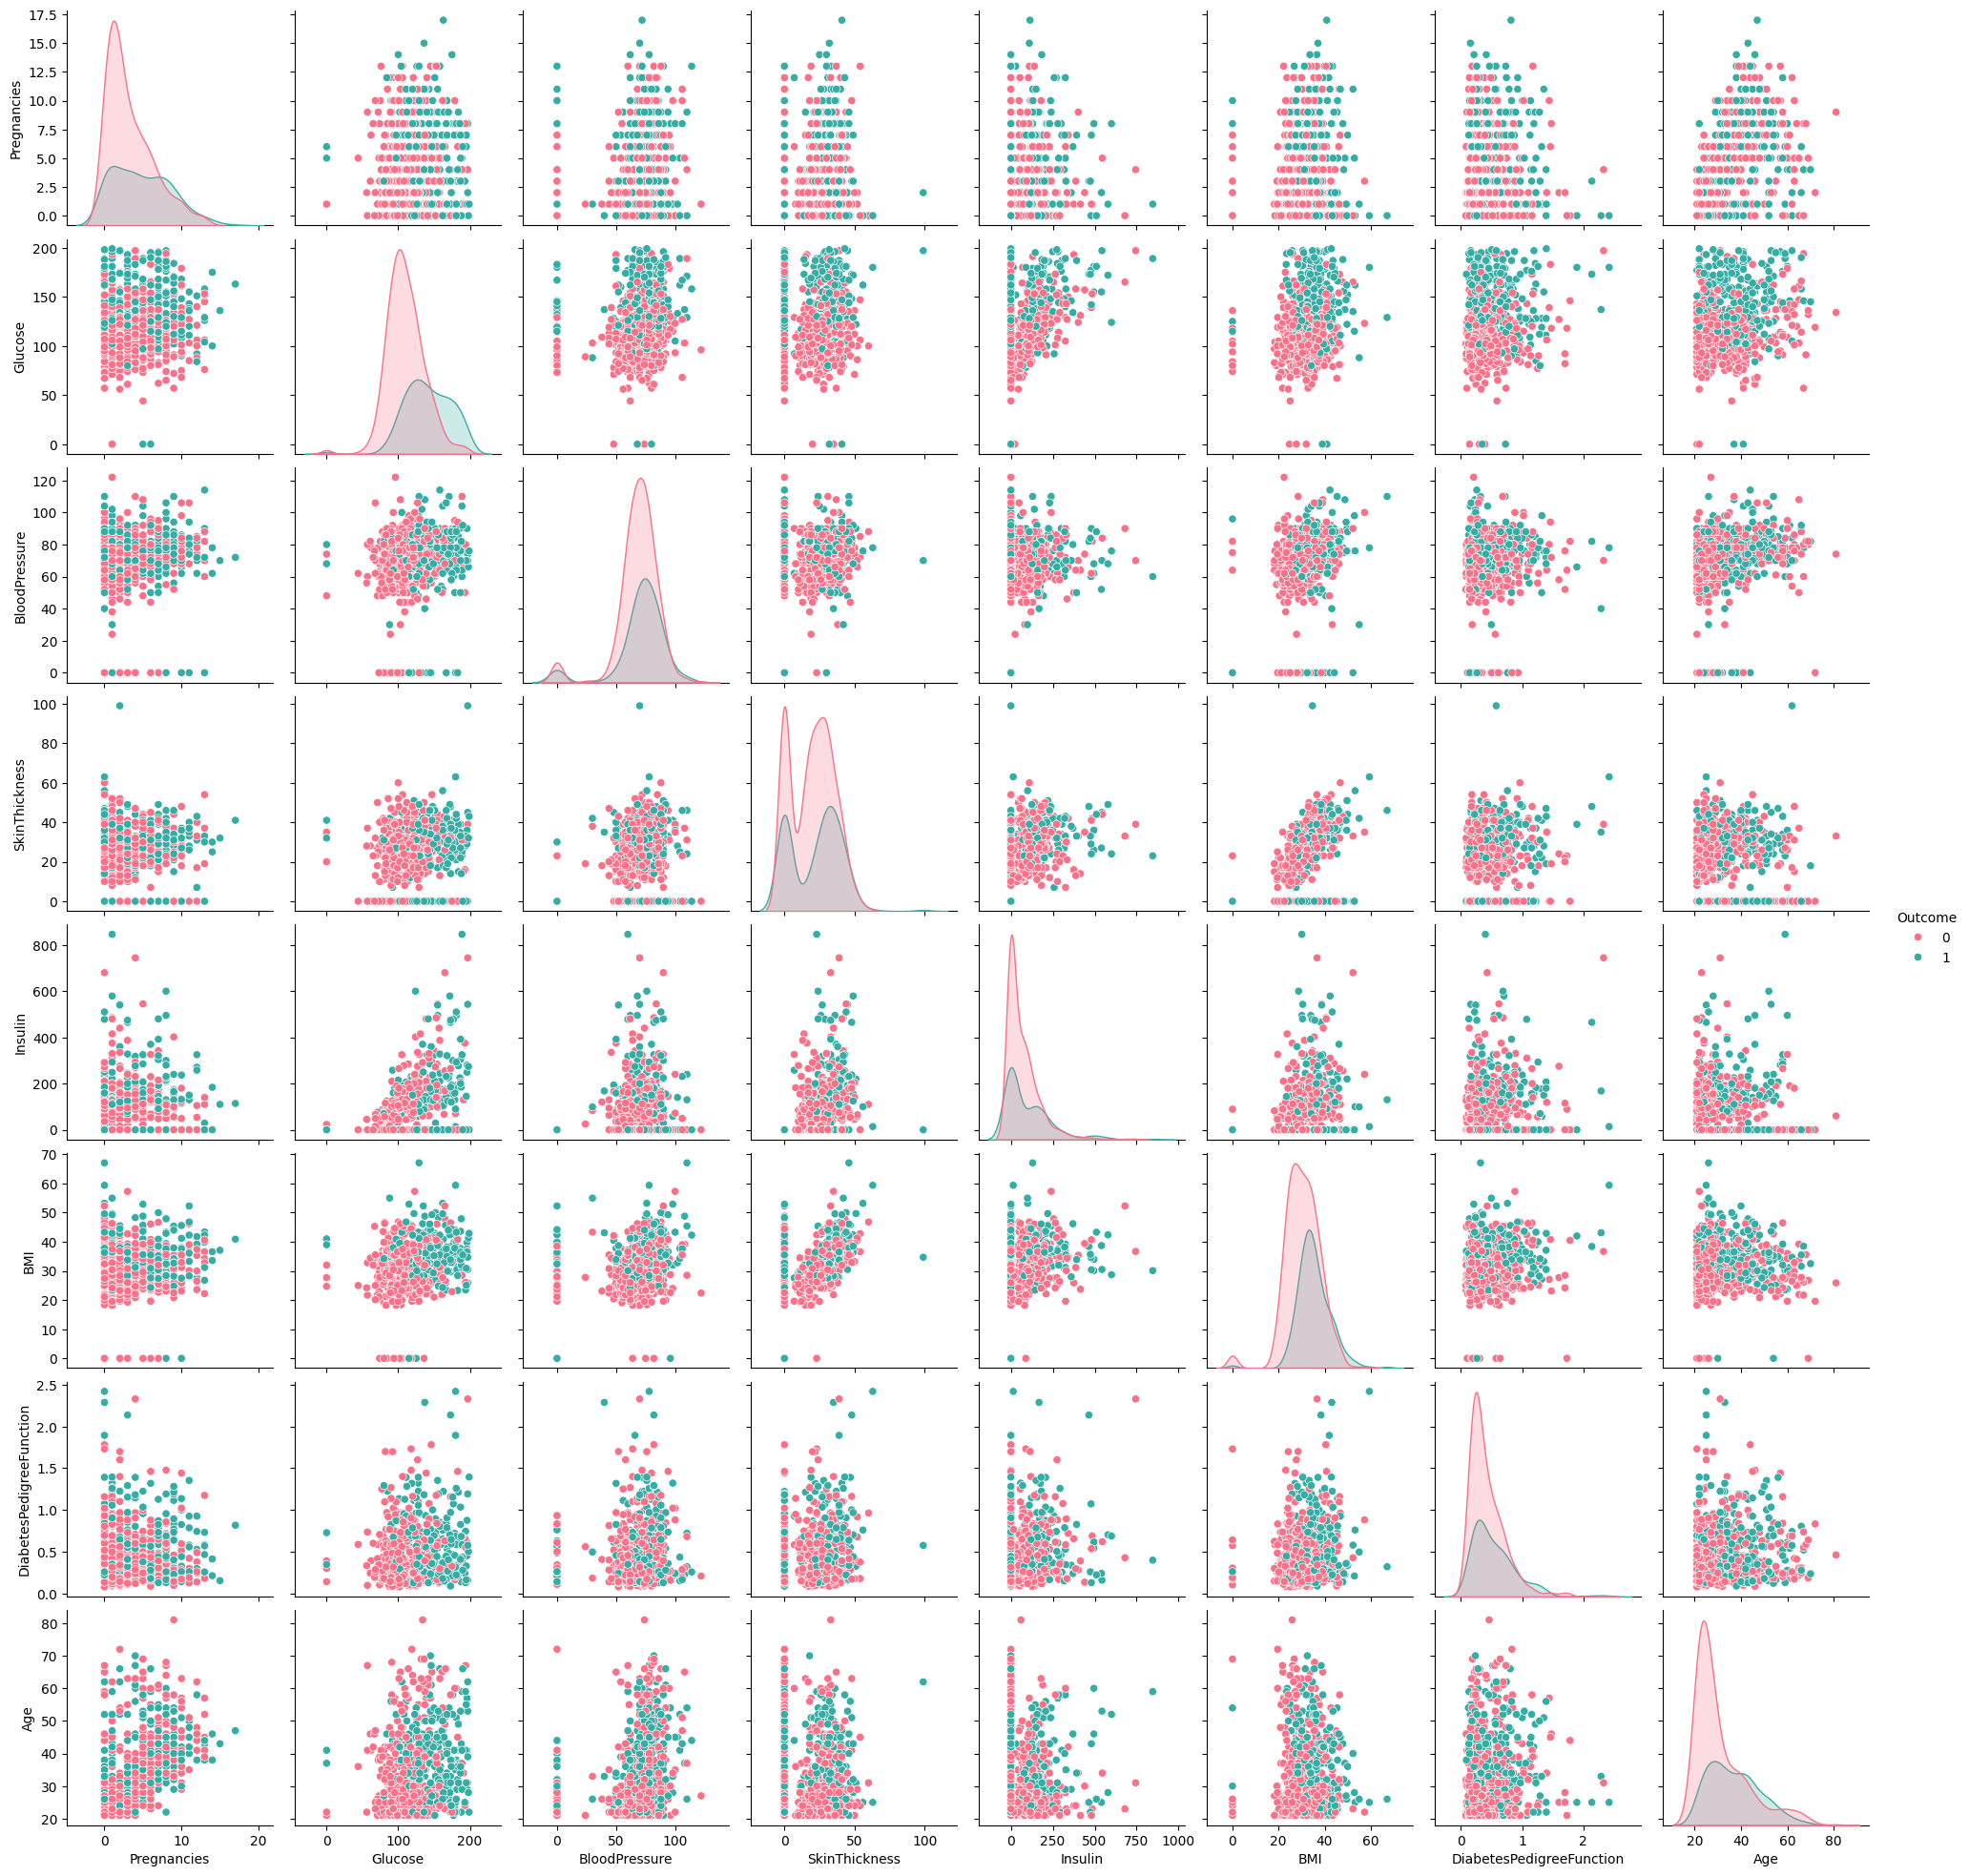

In [47]:
# Create pairwise scatter plots colored by Outcome to visualize relationships between features
sns.pairplot(data.dropna(), hue='Outcome', palette="husl")

In [ ]:
# Normalize labels: Convert any Outcome=2 to Outcome=1 for binary classification
# هنا هوحد اي قيمة بتساوي 2 هخليها ب 1 
data.loc[data['Outcome'] == 2, 'Outcome'] = 1

In [ ]:
# Verify that Outcome only contains valid values (0 and 1)
# هنا بتاكد ان النتائج بتحتوي علي قيم 0 او 1 
data['Outcome'].unique()

array([1, 0], dtype=int64)

## 2.2 Data Filtering and Exploration
Filter and explore specific subsets of the data based on outcome and pregnancies.

In [50]:
# Filter dataset to only diabetic cases (Outcome != 0) with 10 or more pregnancies
data = data.loc[(data['Outcome'] != 0) & (data['Pregnancies'] >= 10)]

<Axes: >

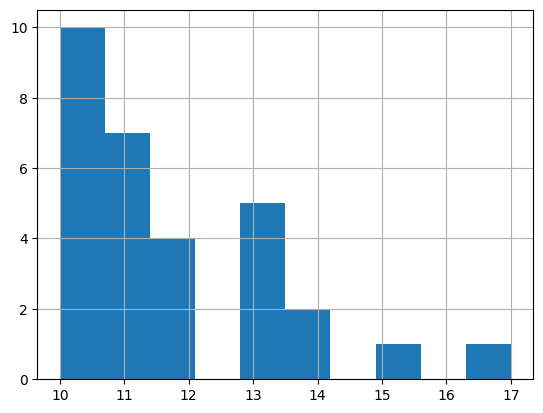

In [51]:
# Plot histogram of Pregnancies distribution for diabetic patients (Outcome=1)
data.loc[data['Outcome'] == 1, 'Pregnancies'].hist()

## 2.3 Reload Dataset for Fresh Analysis
Reload the original dataset to start fresh analysis without previous filters.

In [52]:
# Reload the dataset with proper handling of 'NA' strings as missing values
data = pd.read_csv('diabetes.csv', na_values=['NA'])

## 2.4 Analyze Subgroups
Explore differences between diabetic and non-diabetic groups.

In [53]:
# Display non-diabetic cases (Outcome=0) with fewer than 10 pregnancies
data.loc[(data['Outcome'] == 0) & (data['Pregnancies'] < 10)]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1              1       85             66             29        0  26.6   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
10             4      110             92              0        0  37.6   
18             1      103             30             38       83  43.3   
..           ...      ...            ...            ...      ...   ...   
760            2       88             58             26       16  28.4   
762            9       89             62              0        0  22.5   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
1                       0.351   31        0  
3                       0.167   21        0  
5                       0.201   30        0  
10                      0.191   30        0  
18                      0.183   33        0  
..                        ...  ...      ...  
760                     0.766   22        0  
762                     0.142   33        0  
764                     0.340   27        0  
765                     0.245   30        0  
767                     0.315   23        0  

[472 rows x 9 columns]

<Axes: >

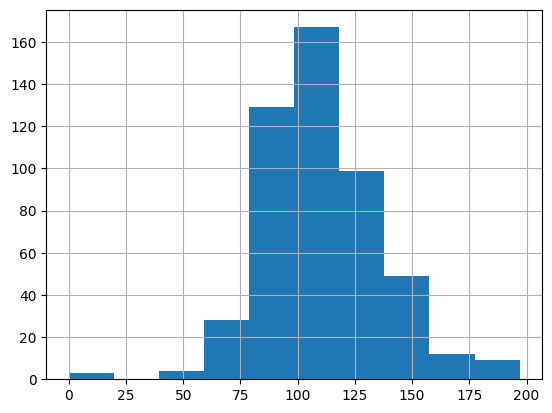

In [54]:
# Plot histogram of Glucose levels for non-diabetic patients (Outcome=0)
data.loc[data['Outcome'] == 0, 'Glucose'].hist()

<Axes: >

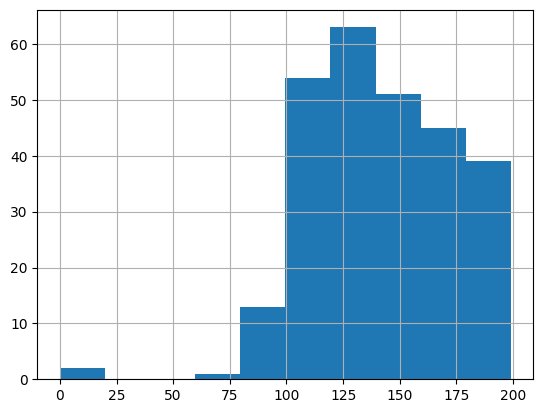

In [55]:
# Plot histogram of Glucose levels for diabetic patients (Outcome=1)
data.loc[data['Outcome'] == 1, 'Glucose'].hist()

In [56]:
# Create subset containing only diabetic cases (Outcome=1)
truediabetes = data.loc[data['Outcome'] == 1]

In [57]:
# Calculate mean values for all features in the diabetic subset
truediabetes.mean()

Pregnancies                   4.865672
Glucose                     141.257463
BloodPressure                70.824627
SkinThickness                22.164179
Insulin                     100.335821
BMI                          35.142537
DiabetesPedigreeFunction      0.550500
Age                          37.067164
Outcome                       1.000000
dtype: float64

In [58]:
# Create subset containing only non-diabetic cases (Outcome=0)
falsediabetes = data.loc[data['Outcome'] == 0]

In [59]:
# Calculate mean values for all features in the non-diabetic subset
falsediabetes.mean()

Pregnancies                   3.298000
Glucose                     109.980000
BloodPressure                68.184000
SkinThickness                19.664000
Insulin                      68.792000
BMI                          30.304200
DiabetesPedigreeFunction      0.429734
Age                          31.190000
Outcome                       0.000000
dtype: float64

In [60]:
# Extract SkinThickness values for non-diabetic patients (Outcome=0)
data.loc[(data['Outcome'] == 0, 'SkinThickness')]

1      29
3      23
5       0
7       0
10      0
       ..
762     0
763    48
764    27
765    23
767    31
Name: SkinThickness, Length: 500, dtype: int64

## 3. Data Cleaning - Handle Zero Values
Replace zero values with NaN in features where zero is physiologically impossible, then impute with median.

In [61]:
# Define features where zero values are physiologically impossible
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zero values with NaN for proper missing value handling
data[zero_features] = data[zero_features].replace(0, np.nan)

# Check how many missing values we now have after replacing zeros
print("Missing values after replacing zeros:")
print(data[zero_features].isna().sum())

# Use median imputation to fill missing values (robust to outliers)
imputer = SimpleImputer(strategy='median')
data[zero_features] = imputer.fit_transform(data[zero_features])

# Verify no missing values remain
print("\nMissing values after imputation:")
print(data[zero_features].isna().sum())

Missing values after replacing zeros:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Missing values after imputation:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


## 4. Verify Data Quality
Check the cleaned dataset for any remaining issues.

## 4.1 Check for Duplicates and Final Summary

In [62]:
# Check for duplicate rows in the cleaned dataset
print(f"Number of duplicate rows: {data.duplicated().sum()}")

# Display final dataset info
print("\nDataset shape:", data.shape)
print("\nData types:")
print(data.dtypes)
print("\nFinal statistical summary:")
data.describe()

Number of duplicate rows: 0

Dataset shape: (768, 9)

Data types:
Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Final statistical summary:


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## 4.2 Outlier Detection and Removal
Identify and remove outliers using the IQR (Interquartile Range) method.

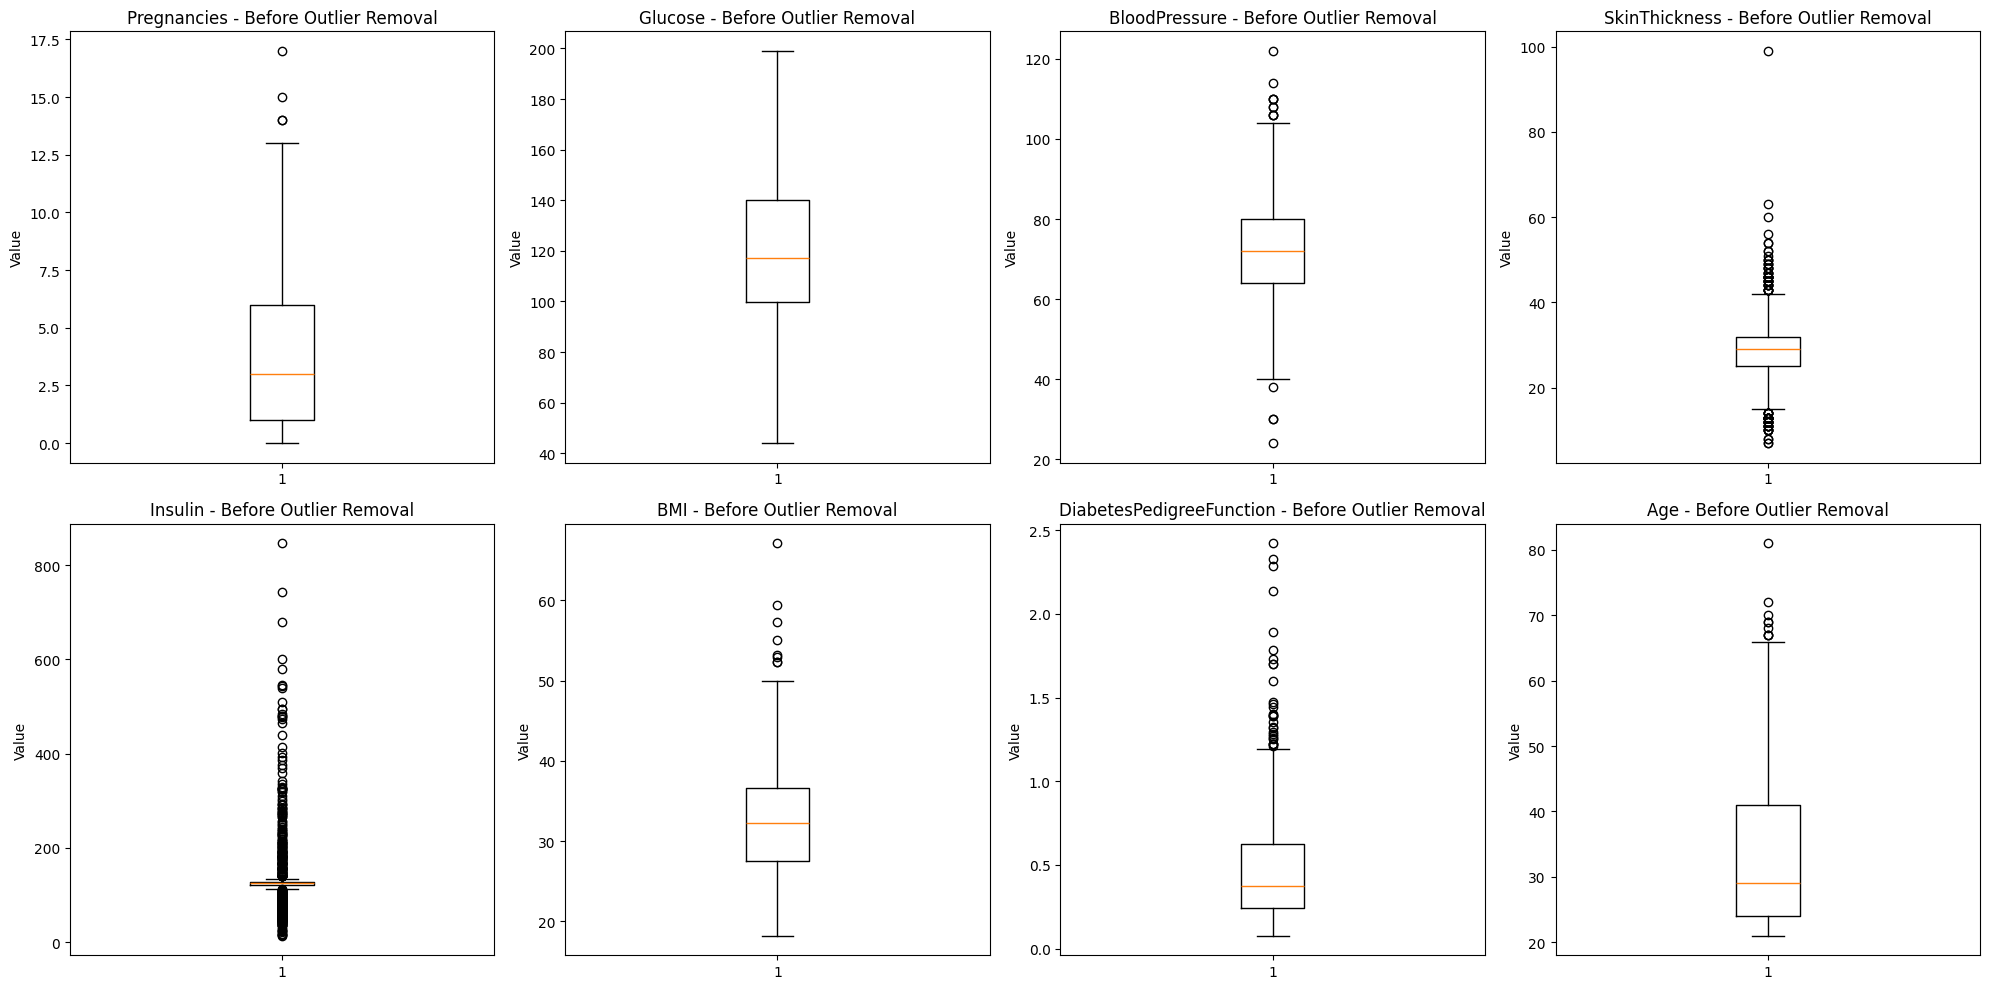

Outliers detected per feature (using IQR method):
Pregnancies: 4 outliers
Glucose: 0 outliers
BloodPressure: 14 outliers
SkinThickness: 87 outliers
Insulin: 346 outliers
BMI: 8 outliers
DiabetesPedigreeFunction: 29 outliers
Age: 9 outliers

Total rows before outlier removal: 768


In [63]:
# Define numerical features for outlier detection
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Visualize outliers before removal
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(data[col].dropna())
    axes[idx].set_title(f'{col} - Before Outlier Removal')
    axes[idx].set_ylabel('Value')

plt.tight_layout()
plt.show()

# Count outliers using IQR method
print("Outliers detected per feature (using IQR method):")
outlier_counts = {}
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_counts[col] = len(outliers)
    print(f"{col}: {len(outliers)} outliers")

print(f"\nTotal rows before outlier removal: {len(data)}")

Total rows after outlier removal: 332
Rows removed: 436
Percentage of data retained: 43.23%


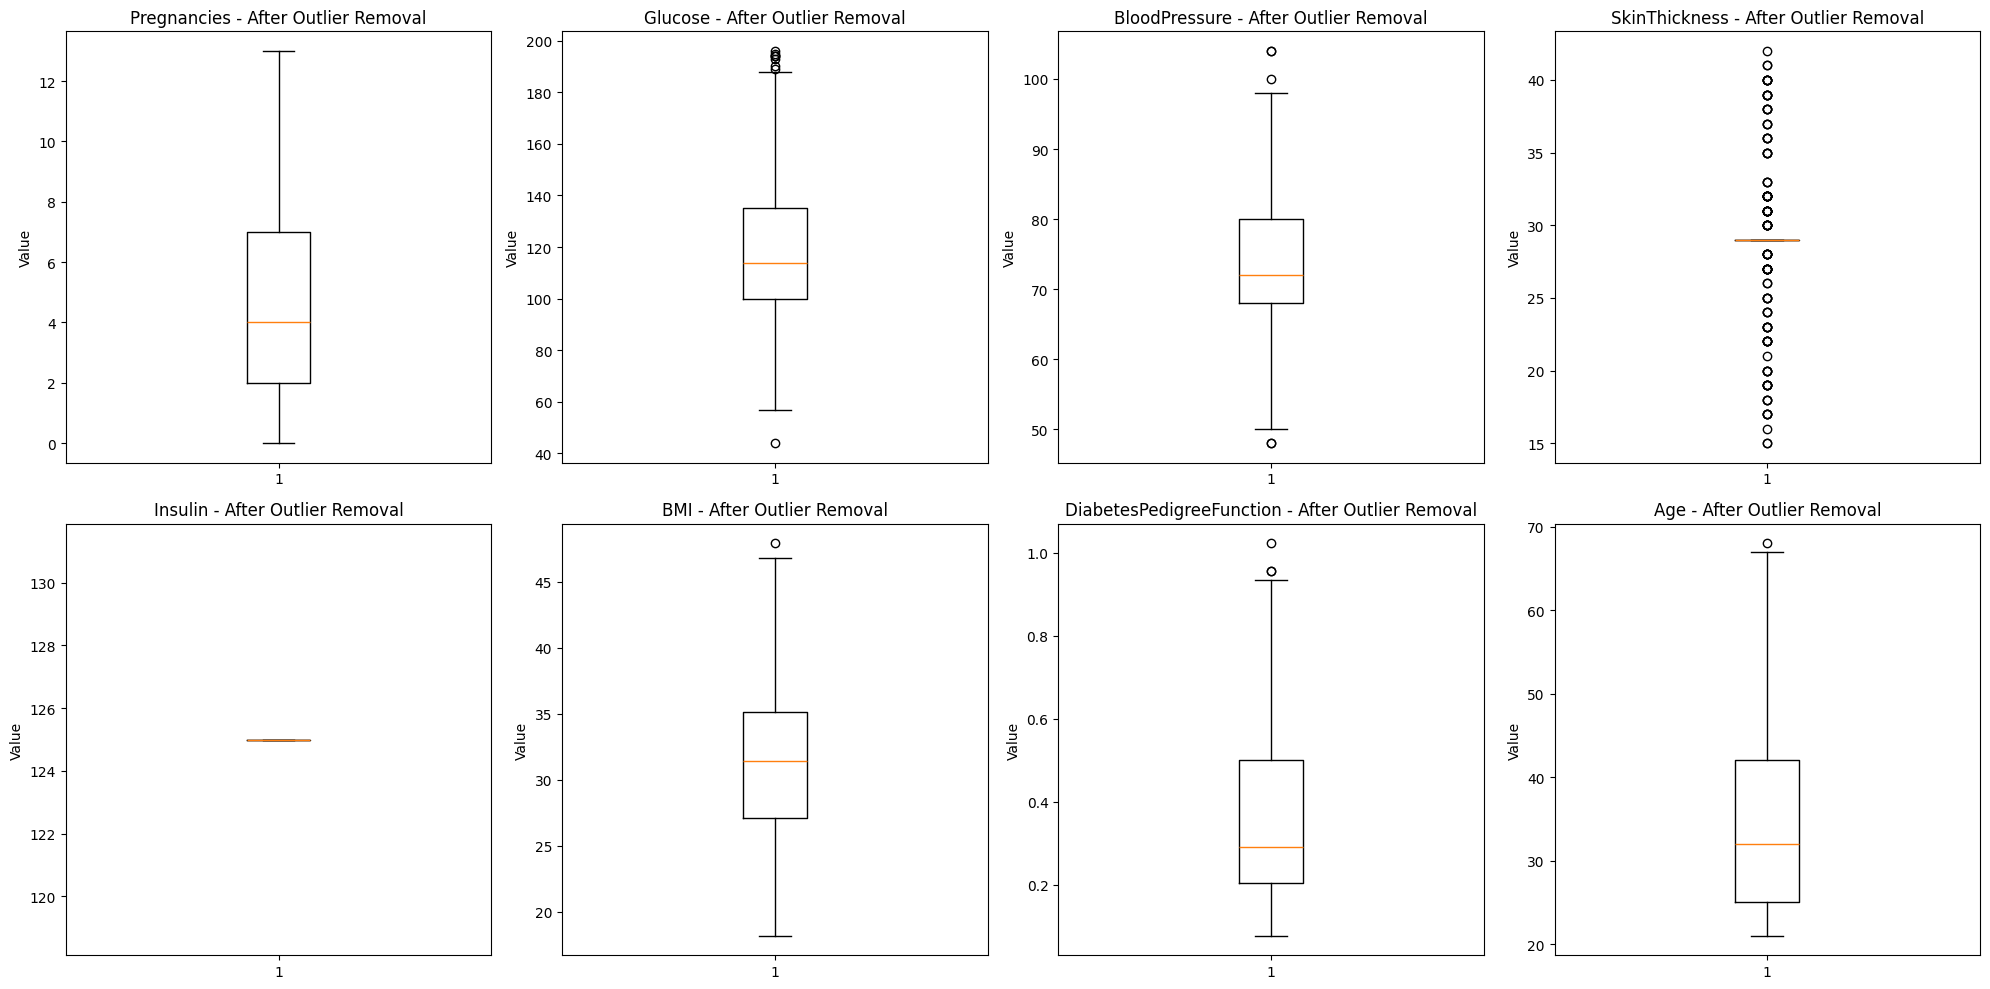


Dataset shape after outlier removal: (332, 9)


In [64]:
# Remove outliers using IQR method
data_before_outlier_removal = data.copy()

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows with outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print(f"Total rows after outlier removal: {len(data)}")
print(f"Rows removed: {len(data_before_outlier_removal) - len(data)}")
print(f"Percentage of data retained: {len(data)/len(data_before_outlier_removal)*100:.2f}%")

# Visualize after outlier removal
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(data[col].dropna())
    axes[idx].set_title(f'{col} - After Outlier Removal')
    axes[idx].set_ylabel('Value')

plt.tight_layout()
plt.show()

print("\nDataset shape after outlier removal:", data.shape)

## 5. Visualizations on Cleaned Data
Create comprehensive visualizations to understand the cleaned dataset.

Text(0.5, 1.02, 'Pairwise Relationships After Data Cleaning')

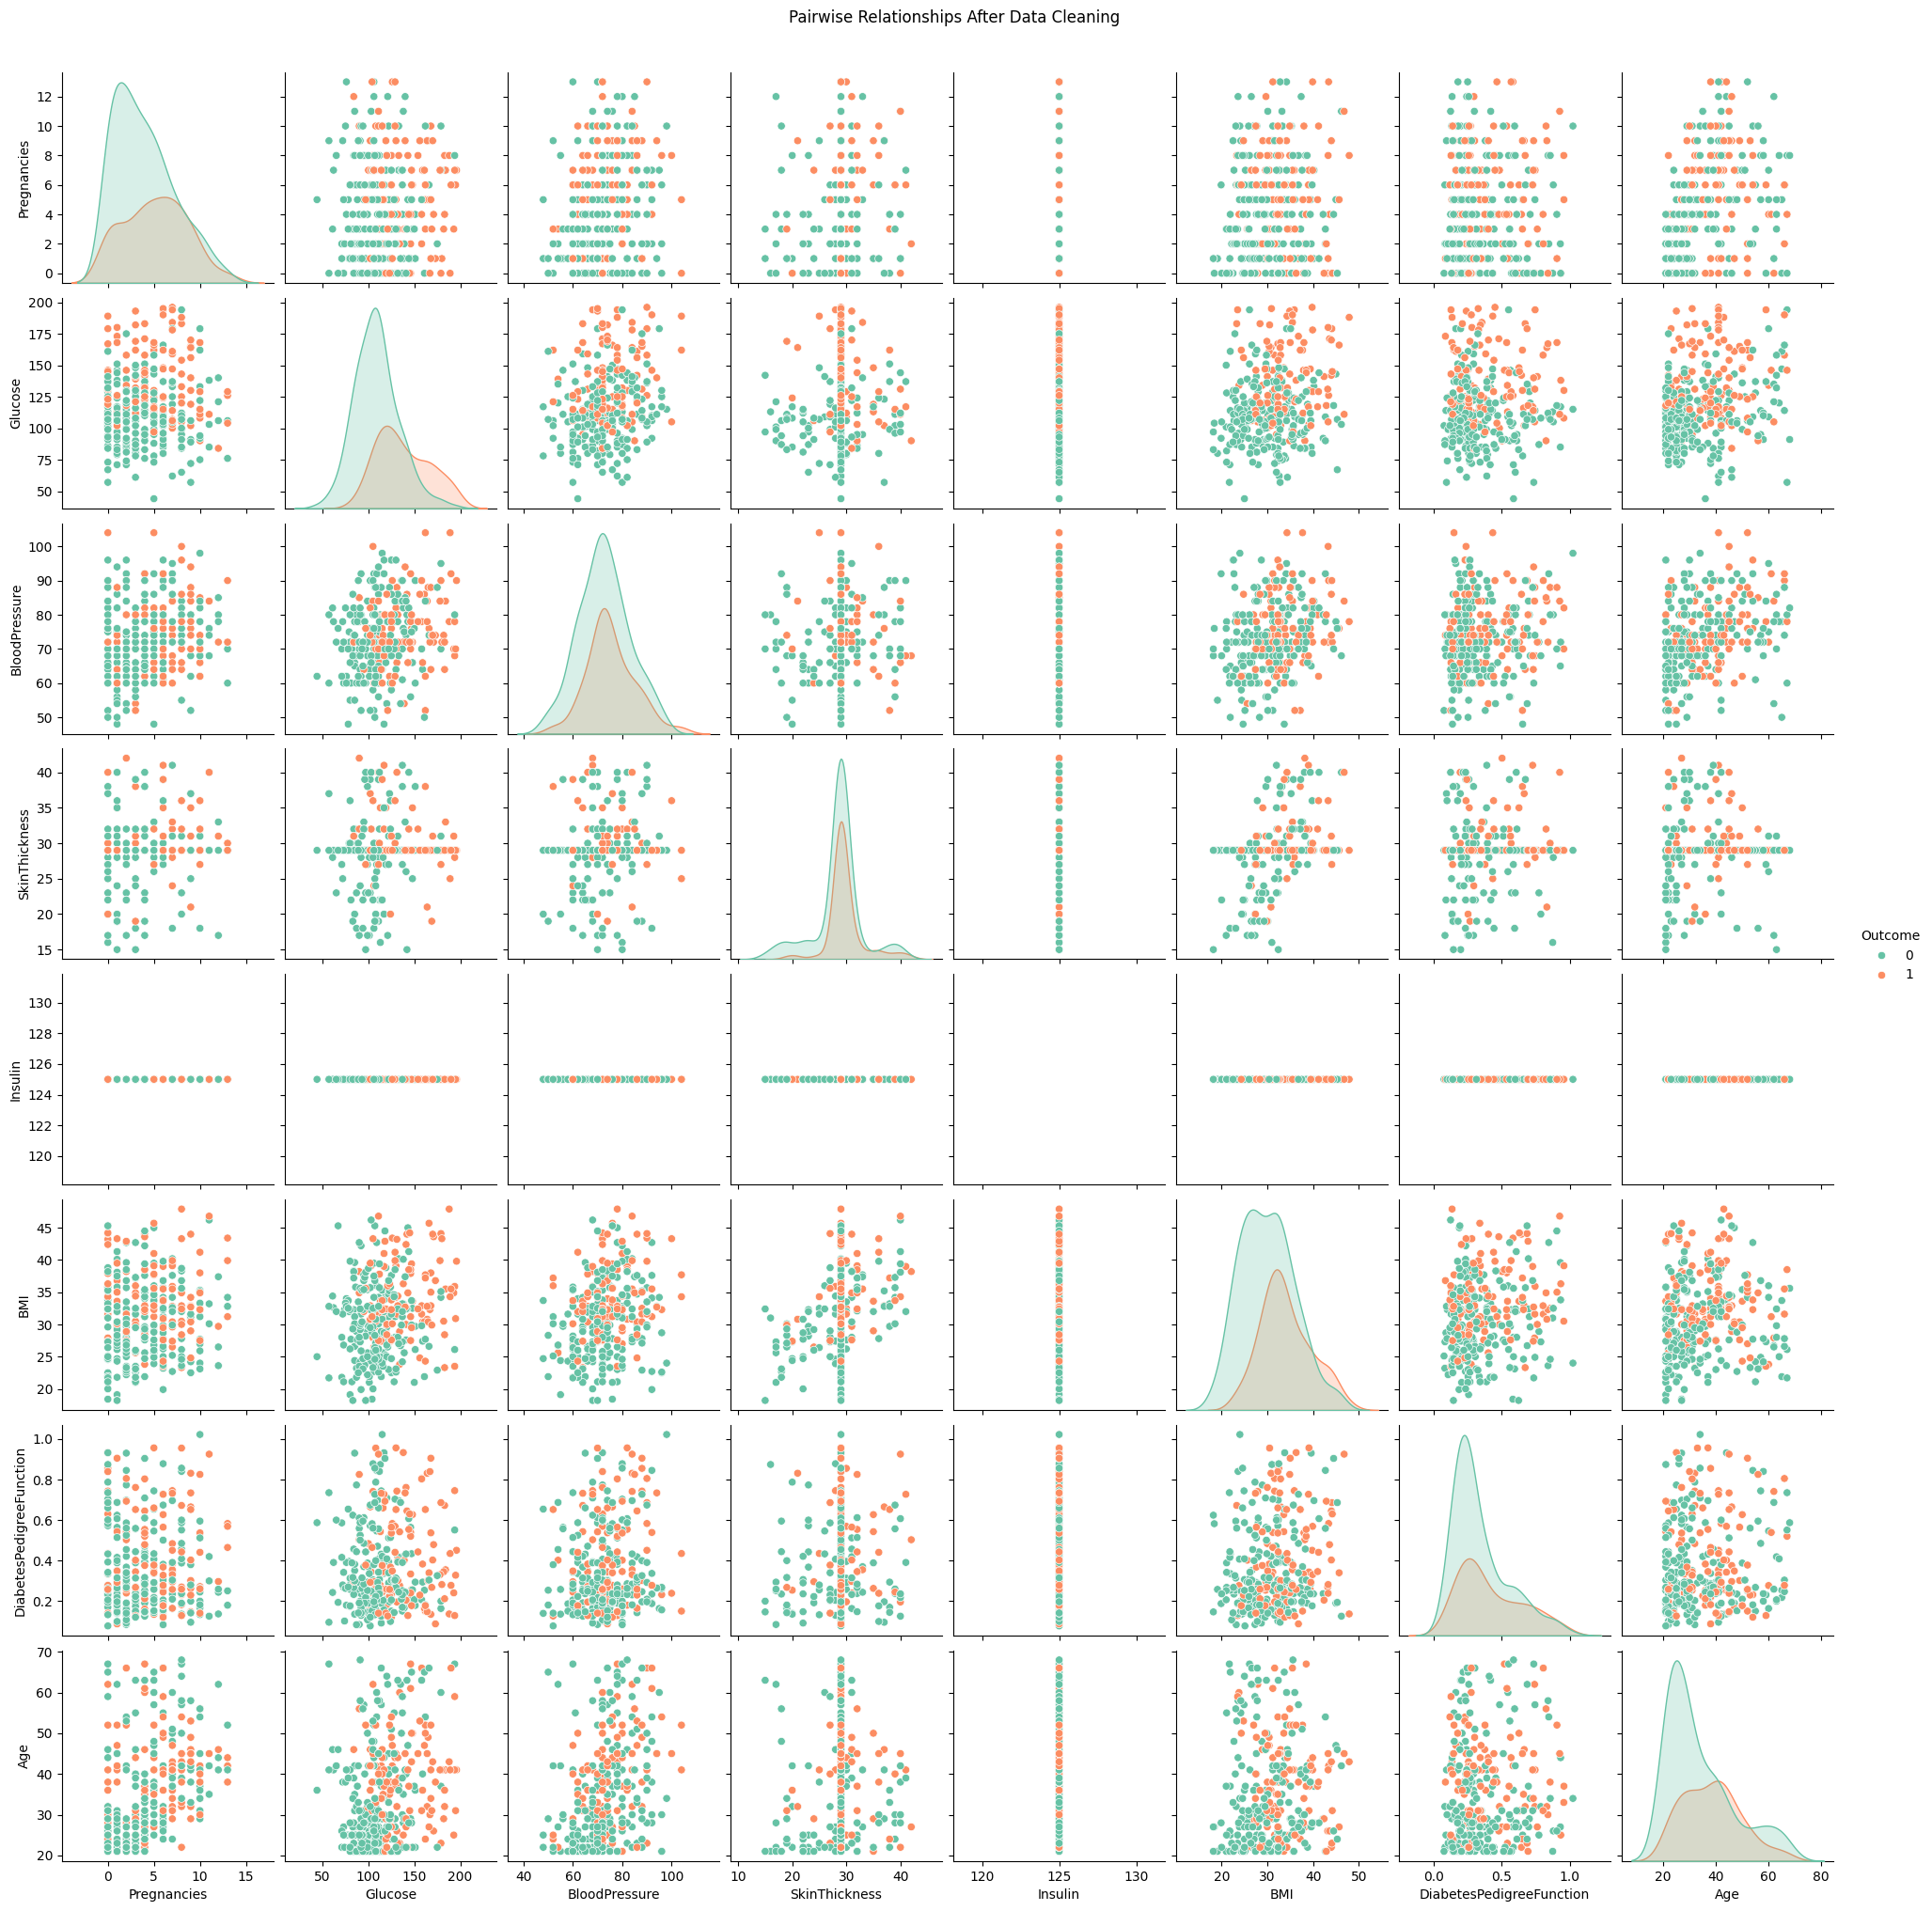

In [65]:
# Create pairwise scatter plots colored by Outcome for the cleaned dataset
sns.pairplot(data, hue='Outcome', palette='Set2')
plt.suptitle('Pairwise Relationships After Data Cleaning', y=1.02)

## 5.1 Correlation Analysis
Examine correlations between features and the target variable.

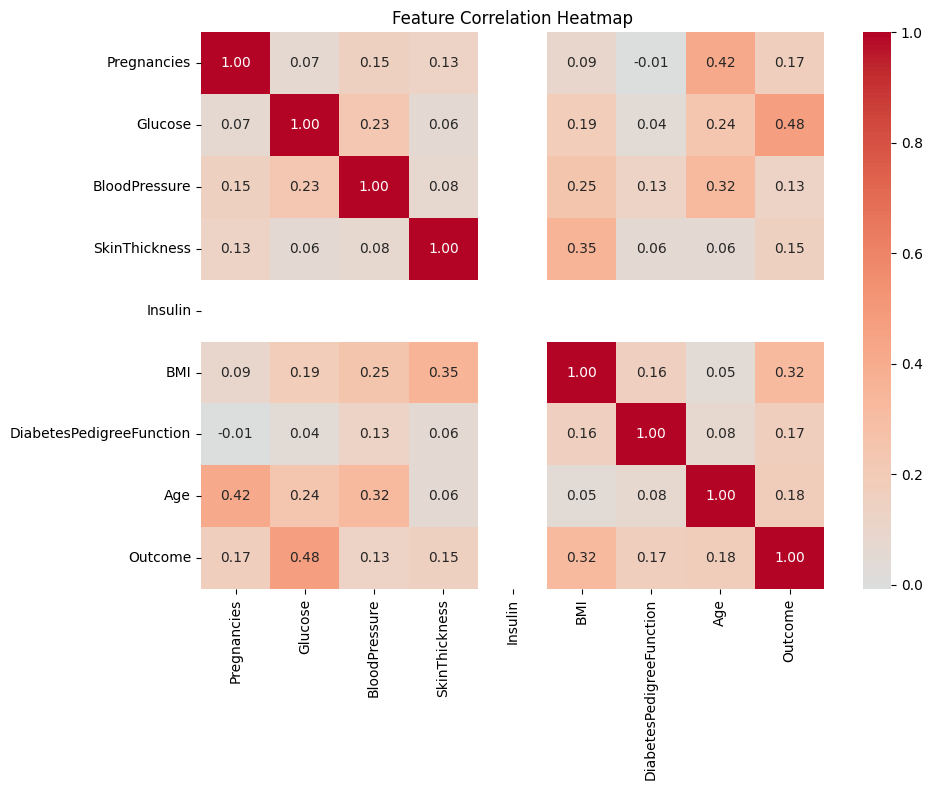


Correlation with Outcome (sorted):
Outcome                     1.000000
Glucose                     0.476102
BMI                         0.317324
Age                         0.178631
Pregnancies                 0.173130
DiabetesPedigreeFunction    0.172606
SkinThickness               0.151165
BloodPressure               0.126985
Insulin                          NaN
Name: Outcome, dtype: float64


In [66]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Display correlations with Outcome sorted
print("\nCorrelation with Outcome (sorted):")
print(correlation_matrix['Outcome'].sort_values(ascending=False))

## 5.2 Distribution Comparisons
Violin plots and box plots to compare feature distributions between diabetic and non-diabetic groups.

C:\Users\moham.MSI-KATANA\AppData\Local\Temp\ipykernel_29516\2251836258.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=column, data=data, palette='Set2')  # Violin plot shows distribution density
C:\Users\moham.MSI-KATANA\AppData\Local\Temp\ipykernel_29516\2251836258.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=column, data=data, palette='Set2')  # Violin plot shows distribution density
C:\Users\moham.MSI-KATANA\AppData\Local\Temp\ipykernel_29516\2251836258.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


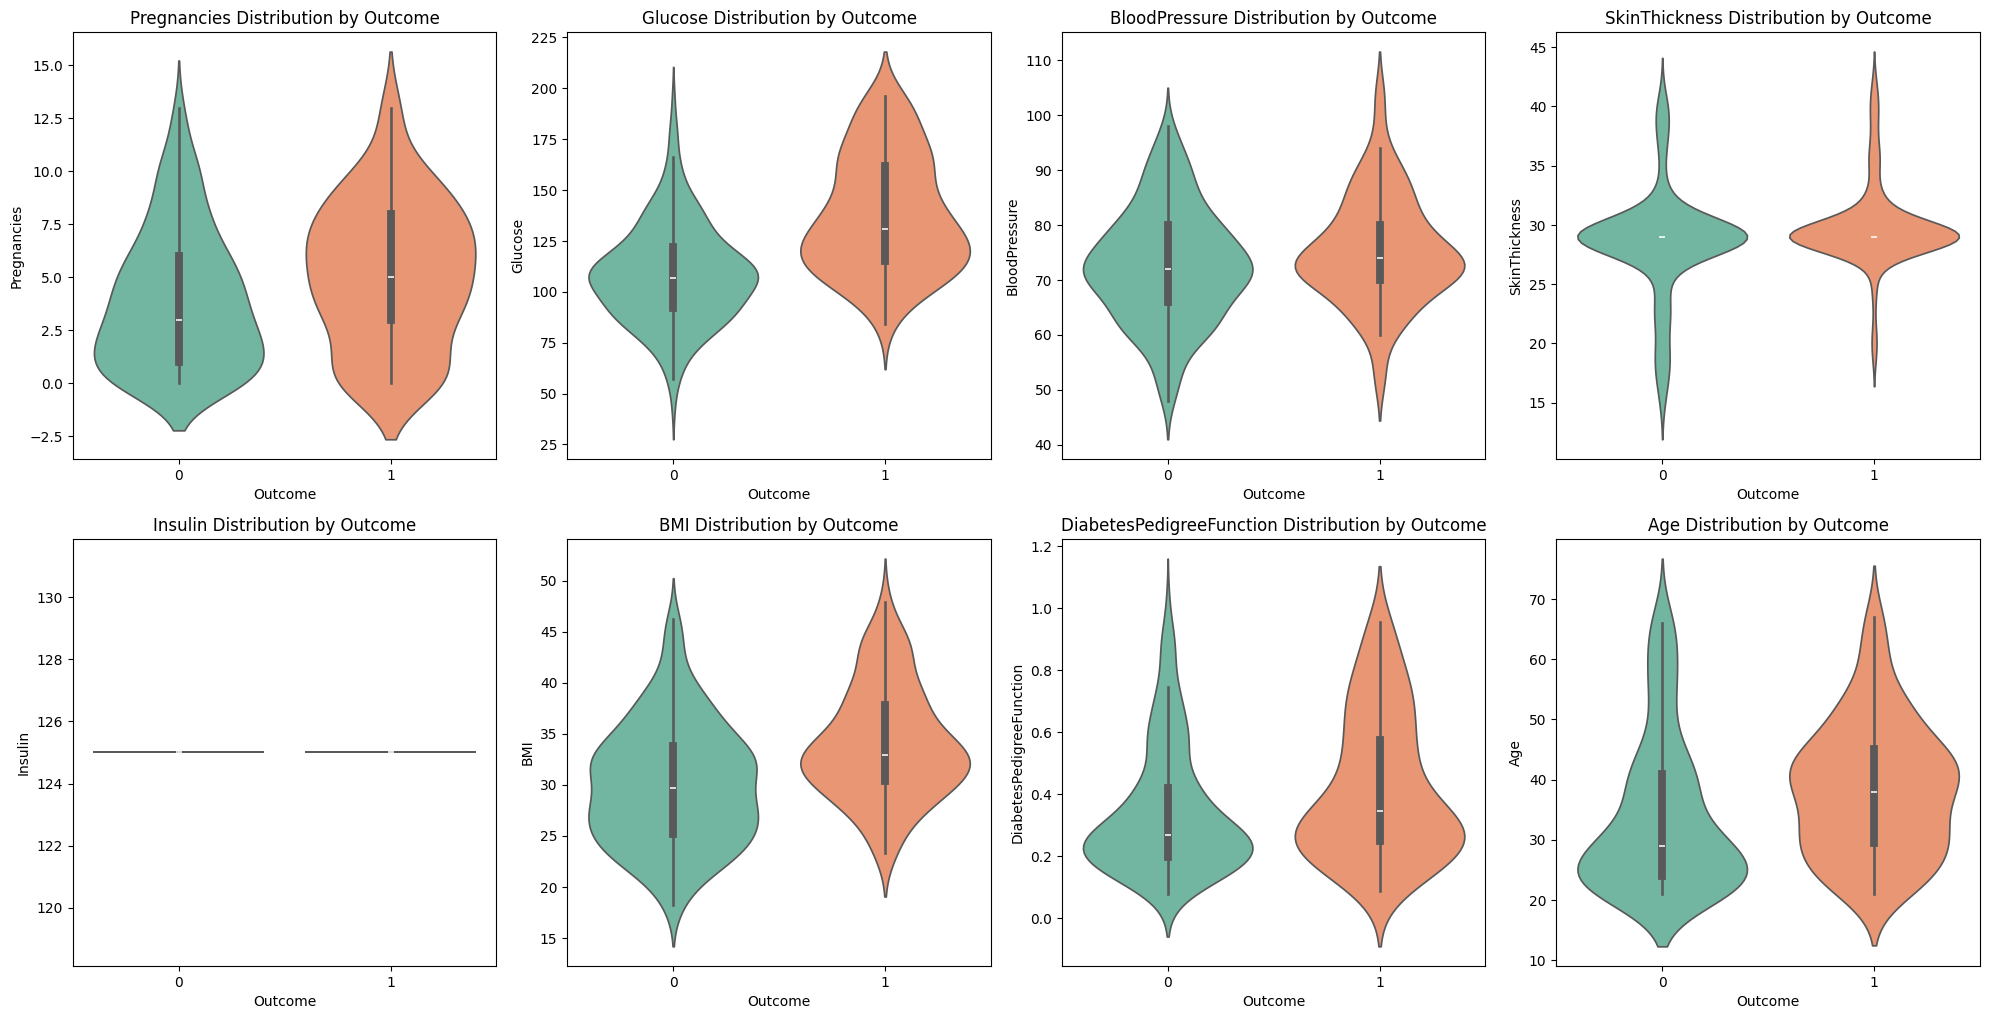

In [67]:
# Create violin plots for each feature, comparing diabetic vs non-diabetic groups
plt.figure(figsize=(20, 20))

for column_index, column in enumerate(data.columns):
    if column == 'Outcome':  # Skip the target variable
        continue
    plt.subplot(4, 4, column_index + 1)  # Create subplot grid
    sns.violinplot(x='Outcome', y=column, data=data, palette='Set2')  # Violin plot shows distribution density
    plt.title(f'{column} Distribution by Outcome')
    
plt.tight_layout()
plt.show()

C:\Users\moham.MSI-KATANA\AppData\Local\Temp\ipykernel_29516\288304050.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=data, palette='Set2')  # Box plot shows quartiles and outliers
C:\Users\moham.MSI-KATANA\AppData\Local\Temp\ipykernel_29516\288304050.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=data, palette='Set2')  # Box plot shows quartiles and outliers
C:\Users\moham.MSI-KATANA\AppData\Local\Temp\ipykernel_29516\288304050.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxp

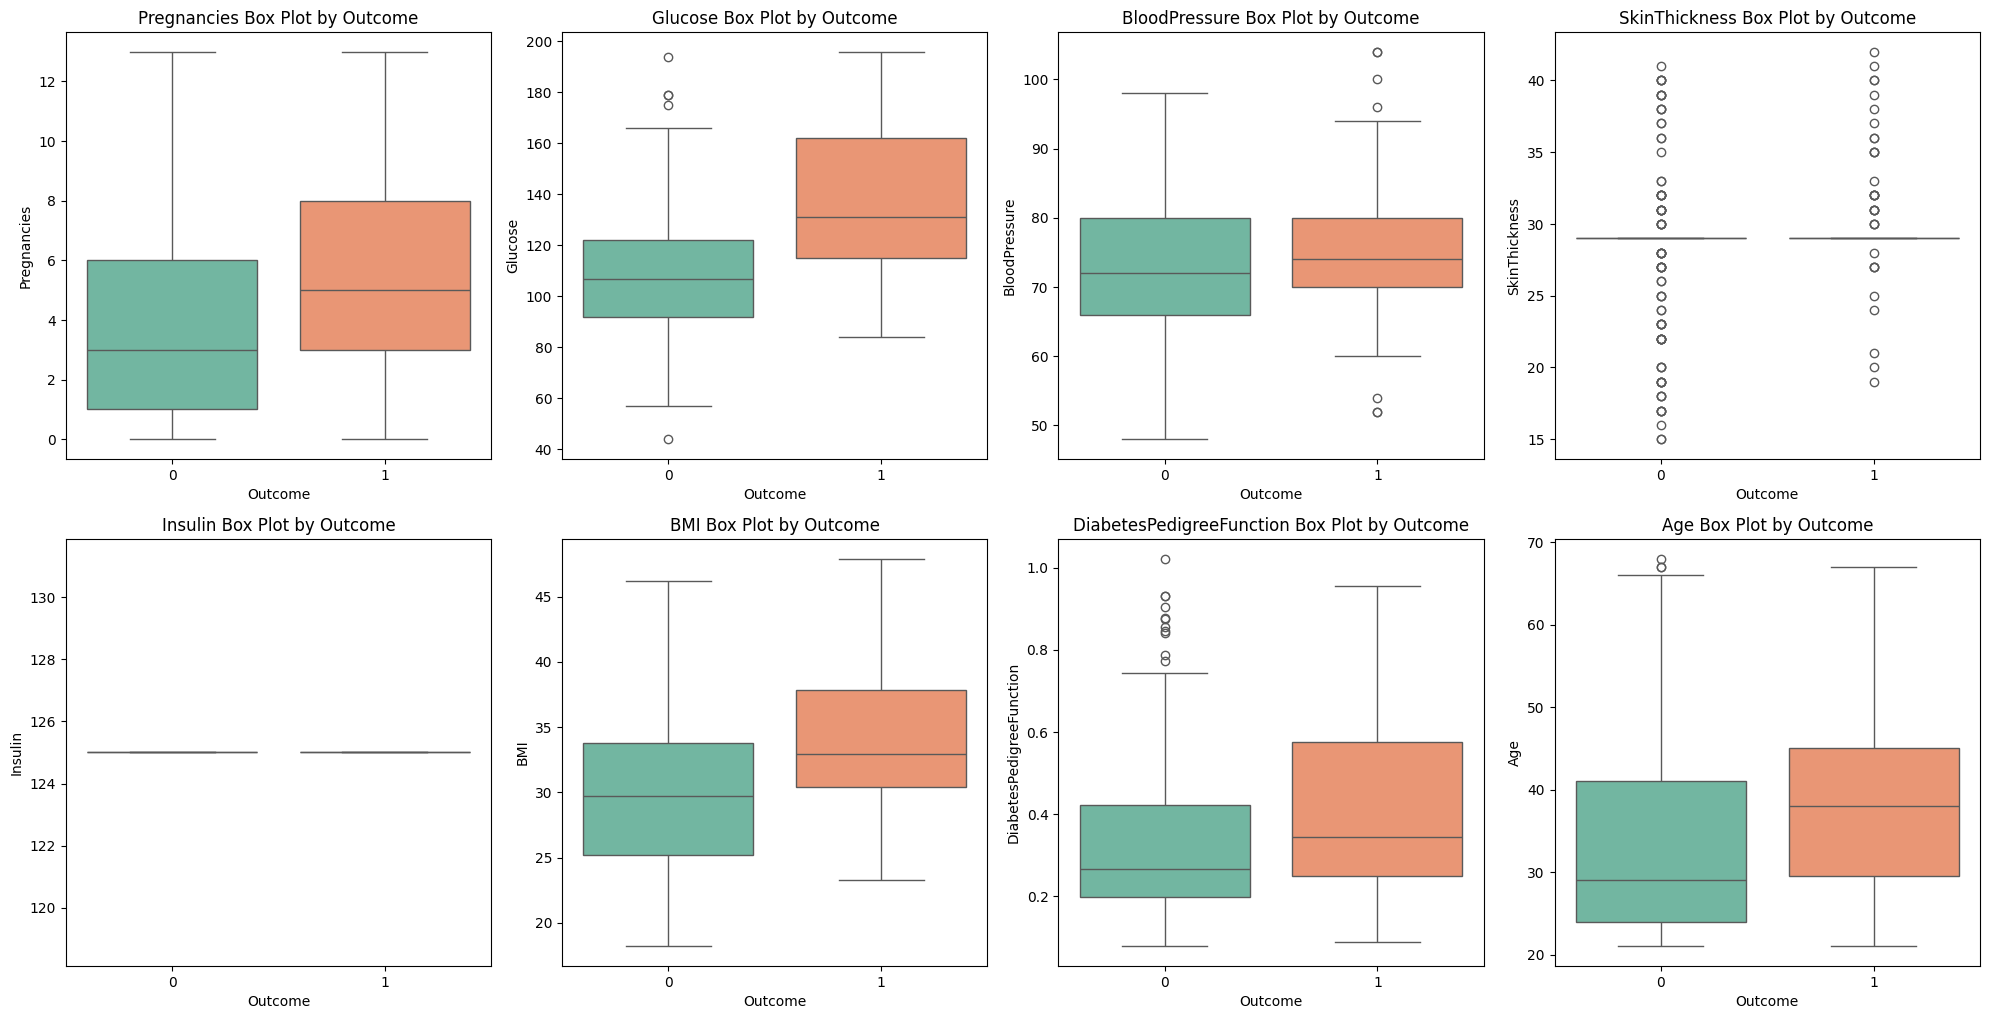

In [68]:
# Create box plots for each feature, comparing diabetic vs non-diabetic groups
plt.figure(figsize=(20, 20))

for column_index, column in enumerate(data.columns):
    if column == 'Outcome':  # Skip the target variable
        continue
    plt.subplot(4, 4, column_index + 1)  # Create subplot grid
    sns.boxplot(x='Outcome', y=column, data=data, palette='Set2')  # Box plot shows quartiles and outliers
    plt.title(f'{column} Box Plot by Outcome')
    
plt.tight_layout()
plt.show()

## 6. Feature Engineering and Data Wrangling
Create new features and transform existing ones to improve model performance.

In [69]:
# Feature Engineering: Create new meaningful features
# Store original numerical features for later reference
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create interaction features
data['BMI_Age'] = data['BMI'] * data['Age']  # BMI-Age interaction
data['Glucose_Insulin'] = data['Glucose'] * data['Insulin']  # Glucose-Insulin relationship
data['BP_BMI'] = data['BloodPressure'] * data['BMI']  # Blood Pressure-BMI interaction

# Create polynomial features for key predictors
data['Glucose_Squared'] = data['Glucose'] ** 2
data['BMI_Squared'] = data['BMI'] ** 2

# Create age groups (binning)
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle', 'Senior'])
data['Age_Group_Encoded'] = data['Age_Group'].cat.codes

# Create BMI categories based on medical standards
data['BMI_Category'] = pd.cut(data['BMI'], 
                               bins=[0, 18.5, 25, 30, 100], 
                               labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
data['BMI_Category_Encoded'] = data['BMI_Category'].cat.codes

# Create Glucose risk levels
data['Glucose_Risk'] = pd.cut(data['Glucose'], 
                               bins=[0, 100, 125, 200], 
                               labels=['Normal', 'Prediabetic', 'Diabetic'])
data['Glucose_Risk_Encoded'] = data['Glucose_Risk'].cat.codes

print("Feature Engineering Complete!")
print(f"Original features: {len(numerical_features)}")
print(f"Total features now: {len(data.columns)}")
print(f"New features created: {len(data.columns) - len(numerical_features) - 1}")  # -1 for Outcome
data.head()

Feature Engineering Complete!
Original features: 8
Total features now: 20
New features created: 11


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
5            5    116.0           74.0           29.0    125.0  25.6   
7           10    115.0           72.0           29.0    125.0  35.3   

   DiabetesPedigreeFunction  Age  Outcome  BMI_Age  Glucose_Insulin  BP_BMI  \
0                     0.627   50        1   1680.0          18500.0  2419.2   
1                     0.351   31        0    824.6          10625.0  1755.6   
2                     0.672   32        1    745.6          22875.0  1491.2   
5                     0.201   30        0    768.0          14500.0  1894.4   
7                     0.134   29        0   1023.7          14375.0  2541.6   

   Glucose_Squared  BMI_Squared Age_Group  Age_Group_Encoded BMI_Category  \
0          21904.0      1128.96    Middle                  1        Obese   
1           7225.0       707.56    Middle                  1   Overweight   
2          33489.0       542.89    Middle                  1       Normal   
5          13456.0       655.36     Young                  0   Overweight   
7          13225.0      1246.09     Young                  0        Obese   

   BMI_Category_Encoded Glucose_Risk  Glucose_Risk_Encoded  
0                     3     Diabetic                     2  
1                     2       Normal                     0  
2                     1     Diabetic                     2  
5                     2  Prediabetic                     1  
7                     3  Prediabetic                     1

## 6.1 Distribution Stabilization
Apply transformations to stabilize skewed distributions and make data more normally distributed.

**Important Note**: After aggressive IQR outlier removal, some features (like Insulin) may become constant. The code automatically detects and skips transformation for such features to prevent errors.

Original Skewness:
Pregnancies: 0.498
Glucose: 0.558
BloodPressure: 0.199
SkinThickness: -0.196
Insulin: 0.000
BMI: 0.301
DiabetesPedigreeFunction: 1.019
Age: 0.843

FEATURE VARIABILITY CHECK
✓ Pregnancies: 14 unique values, CV=76.77% - CAN be transformed
✓ Glucose: 112 unique values, CV=24.58% - CAN be transformed
✓ BloodPressure: 34 unique values, CV=13.90% - CAN be transformed
✓ SkinThickness: 27 unique values, CV=14.59% - CAN be transformed
✗ Insulin: 1 unique values, CV=0.00% - SKIP transformation (constant/low variability)
✓ BMI: 161 unique values, CV=19.32% - CAN be transformed
✓ DiabetesPedigreeFunction: 254 unique values, CV=58.65% - CAN be transformed
✓ Age: 48 unique values, CV=34.88% - CAN be transformed

APPLYING DISTRIBUTION STABILIZATION
✓ Log transformation applied to DiabetesPedigreeFunction
✓ Square root transformation applied to SkinThickness
✓ Box-Cox transformation applied to DiabetesPedigreeFunction

⚠ NOTE: Insulin has become constant (value=125.00) after outlier

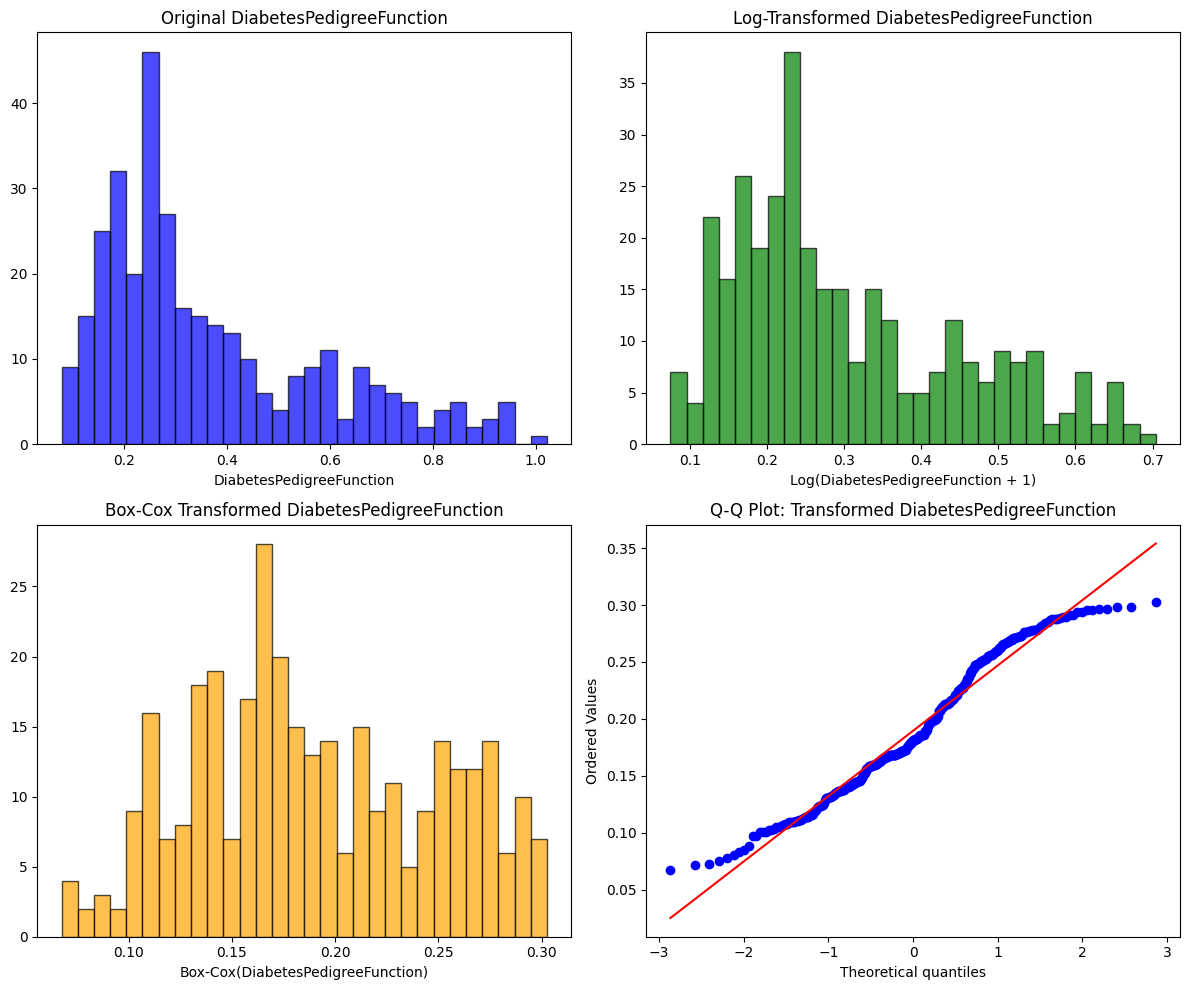


DISTRIBUTION STABILIZATION COMPLETE
Features transformed: 1
Features skipped (constant): 1


In [70]:
# Import transformation libraries
from scipy import stats

# Check original distributions
print("Original Skewness:")
for feature in numerical_features:
    skewness = data[feature].skew()
    print(f"{feature}: {skewness:.3f}")

# Identify features with sufficient variability for transformation
print("\n" + "="*60)
print("FEATURE VARIABILITY CHECK")
print("="*60)
features_for_transformation = []
constant_features = []

for feature in numerical_features:
    unique_count = data[feature].nunique()
    cv = (data[feature].std() / data[feature].mean() * 100) if data[feature].mean() > 0 else 0
    
    if unique_count > 1 and cv > 1:  # More than 1 unique value and CV > 1%
        features_for_transformation.append(feature)
        print(f"✓ {feature}: {unique_count} unique values, CV={cv:.2f}% - CAN be transformed")
    else:
        constant_features.append(feature)
        print(f"✗ {feature}: {unique_count} unique values, CV={cv:.2f}% - SKIP transformation (constant/low variability)")

# Apply transformations only to features with sufficient variability
print("\n" + "="*60)
print("APPLYING DISTRIBUTION STABILIZATION")
print("="*60)

# Apply log transformation to highly skewed features
skewed_features = ['DiabetesPedigreeFunction']  # Insulin removed due to constant values

for feature in skewed_features:
    if feature in features_for_transformation:
        data[f'{feature}_Log'] = np.log1p(data[feature])
        print(f"✓ Log transformation applied to {feature}")
    else:
        print(f"✗ Skipping {feature} (constant or low variability)")

# Apply square root transformation for moderate skewness
if 'SkinThickness' in features_for_transformation:
    data['SkinThickness_Sqrt'] = np.sqrt(data['SkinThickness'])
    print(f"✓ Square root transformation applied to SkinThickness")
else:
    print(f"✗ Skipping SkinThickness (constant or low variability)")

# Apply Box-Cox transformation only if feature has variability
if 'DiabetesPedigreeFunction' in features_for_transformation:
    if data['DiabetesPedigreeFunction'].nunique() > 1:
        data['DiabetesPedigreeFunction_BoxCox'], _ = stats.boxcox(data['DiabetesPedigreeFunction'] + 1)
        print(f"✓ Box-Cox transformation applied to DiabetesPedigreeFunction")
    else:
        data['DiabetesPedigreeFunction_BoxCox'] = data['DiabetesPedigreeFunction_Log']
        print(f"✗ Box-Cox skipped for DiabetesPedigreeFunction (using log instead)")
else:
    print(f"✗ Skipping DiabetesPedigreeFunction Box-Cox (constant or low variability)")

# For Insulin: Since it became constant after outlier removal, we'll keep the original
# This is expected behavior when aggressive outlier removal is applied
print(f"\n⚠ NOTE: Insulin has become constant (value={data['Insulin'].iloc[0]:.2f}) after outlier removal.")
print(f"   This means all outliers were removed, leaving only the median value.")
print(f"   This feature will have limited predictive power but won't cause errors.")

# Visualize transformations for a feature with variability
if len(features_for_transformation) > 0:
    # Choose DiabetesPedigreeFunction for visualization
    feature_to_visualize = 'DiabetesPedigreeFunction'
    
    if feature_to_visualize in features_for_transformation:
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        
        # Original
        axes[0, 0].hist(data[feature_to_visualize], bins=30, edgecolor='black', alpha=0.7, color='blue')
        axes[0, 0].set_title(f'Original {feature_to_visualize}')
        axes[0, 0].set_xlabel(feature_to_visualize)
        
        # Log-transformed
        axes[0, 1].hist(data[f'{feature_to_visualize}_Log'], bins=30, edgecolor='black', alpha=0.7, color='green')
        axes[0, 1].set_title(f'Log-Transformed {feature_to_visualize}')
        axes[0, 1].set_xlabel(f'Log({feature_to_visualize} + 1)')
        
        # Box-Cox transformed
        axes[1, 0].hist(data[f'{feature_to_visualize}_BoxCox'], bins=30, edgecolor='black', alpha=0.7, color='orange')
        axes[1, 0].set_title(f'Box-Cox Transformed {feature_to_visualize}')
        axes[1, 0].set_xlabel(f'Box-Cox({feature_to_visualize})')
        
        # Q-Q plot for transformed data
        stats.probplot(data[f'{feature_to_visualize}_BoxCox'], dist="norm", plot=axes[1, 1])
        axes[1, 1].set_title(f'Q-Q Plot: Transformed {feature_to_visualize}')
        
        plt.tight_layout()
        plt.show()
    else:
        print("\n✗ No features available for transformation visualization")
else:
    print("\n✗ No features available for transformation (all constant or low variability)")

print("\n" + "="*60)
print("DISTRIBUTION STABILIZATION COMPLETE")
print("="*60)
print(f"Features transformed: {len([f for f in skewed_features if f in features_for_transformation])}")
print(f"Features skipped (constant): {len(constant_features)}")

## 6.2 Feature Scaling Techniques
Apply different scaling methods to normalize features for machine learning.

In [71]:
# Import scaling libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

# Prepare feature set (only numerical features for scaling)
features_to_scale = numerical_features.copy()

# Create a clean copy for scaling demonstrations
scaling_data = data[features_to_scale].copy()

print("FEATURE SCALING TECHNIQUES COMPARISON\n")

# 1. STANDARDIZATION (Z-Score Normalization)
# Formula: (x - mean) / std
# Use when: Features are normally distributed, sensitive to outliers
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(scaling_data)
df_standardized = pd.DataFrame(data_standardized, columns=features_to_scale)

print("1. STANDARDIZATION (StandardScaler)")
print("   - Centers data around mean=0, std=1")
print("   - Good for: Normally distributed data, algorithms like SVM, Logistic Regression")
print(f"   - Mean after scaling: {df_standardized.mean().mean():.6f}")
print(f"   - Std after scaling: {df_standardized.std().mean():.6f}")

# 2. MIN-MAX NORMALIZATION
# Formula: (x - min) / (max - min)
# Use when: You need bounded values [0,1], neural networks
minmax_scaler = MinMaxScaler()
data_minmax = minmax_scaler.fit_transform(scaling_data)
df_minmax = pd.DataFrame(data_minmax, columns=features_to_scale)

print("\n2. MIN-MAX NORMALIZATION (MinMaxScaler)")
print("   - Scales features to range [0, 1]")
print("   - Good for: Neural networks, image processing, bounded algorithms")
print(f"   - Min after scaling: {df_minmax.min().min():.6f}")
print(f"   - Max after scaling: {df_minmax.max().max():.6f}")

# 3. ROBUST SCALING
# Formula: (x - median) / IQR
# Use when: Data has outliers
robust_scaler = RobustScaler()
data_robust = robust_scaler.fit_transform(scaling_data)
df_robust = pd.DataFrame(data_robust, columns=features_to_scale)

print("\n3. ROBUST SCALING (RobustScaler)")
print("   - Uses median and IQR, resistant to outliers")
print("   - Good for: Data with outliers, skewed distributions")
print(f"   - Median after scaling: {df_robust.median().median():.6f}")
print(f"   - IQR preserved: Yes")

# 4. L2 NORMALIZATION
# Formula: x / ||x||₂
# Use when: Direction matters more than magnitude
normalizer = Normalizer(norm='l2')
data_normalized = normalizer.fit_transform(scaling_data)
df_normalized = pd.DataFrame(data_normalized, columns=features_to_scale)

print("\n4. L2 NORMALIZATION (Normalizer)")
print("   - Scales each sample to unit norm")
print("   - Good for: Text classification, cosine similarity")
print(f"   - Row norms (sample): {np.linalg.norm(df_normalized.iloc[0]):.6f}")

# Store the standardized data for later use (most common choice)
data_scaled = df_standardized.copy()
data_scaled['Outcome'] = data['Outcome'].values

print("\nSCALING COMPARISON - First Feature (Pregnancies)")
print(f"Original:      Mean={scaling_data['Pregnancies'].mean():.2f}, Std={scaling_data['Pregnancies'].std():.2f}, Min={scaling_data['Pregnancies'].min():.2f}, Max={scaling_data['Pregnancies'].max():.2f}")
print(f"Standardized:  Mean={df_standardized['Pregnancies'].mean():.2f}, Std={df_standardized['Pregnancies'].std():.2f}, Min={df_standardized['Pregnancies'].min():.2f}, Max={df_standardized['Pregnancies'].max():.2f}")
print(f"MinMax:        Mean={df_minmax['Pregnancies'].mean():.2f}, Std={df_minmax['Pregnancies'].std():.2f}, Min={df_minmax['Pregnancies'].min():.2f}, Max={df_minmax['Pregnancies'].max():.2f}")
print(f"Robust:        Mean={df_robust['Pregnancies'].mean():.2f}, Std={df_robust['Pregnancies'].std():.2f}, Min={df_robust['Pregnancies'].min():.2f}, Max={df_robust['Pregnancies'].max():.2f}")

FEATURE SCALING TECHNIQUES COMPARISON

1. STANDARDIZATION (StandardScaler)
   - Centers data around mean=0, std=1
   - Good for: Normally distributed data, algorithms like SVM, Logistic Regression
   - Mean after scaling: 0.000000
   - Std after scaling: 0.876321

2. MIN-MAX NORMALIZATION (MinMaxScaler)
   - Scales features to range [0, 1]
   - Good for: Neural networks, image processing, bounded algorithms
   - Min after scaling: 0.000000
   - Max after scaling: 1.000000

3. ROBUST SCALING (RobustScaler)
   - Uses median and IQR, resistant to outliers
   - Good for: Data with outliers, skewed distributions
   - Median after scaling: 0.000000
   - IQR preserved: Yes

4. L2 NORMALIZATION (Normalizer)
   - Scales each sample to unit norm
   - Good for: Text classification, cosine similarity
   - Row norms (sample): 1.000000

SCALING COMPARISON - First Feature (Pregnancies)
Original:      Mean=4.36, Std=3.35, Min=0.00, Max=13.00
Standardized:  Mean=-0.00, Std=1.00, Min=-1.30, Max=2.58
Min

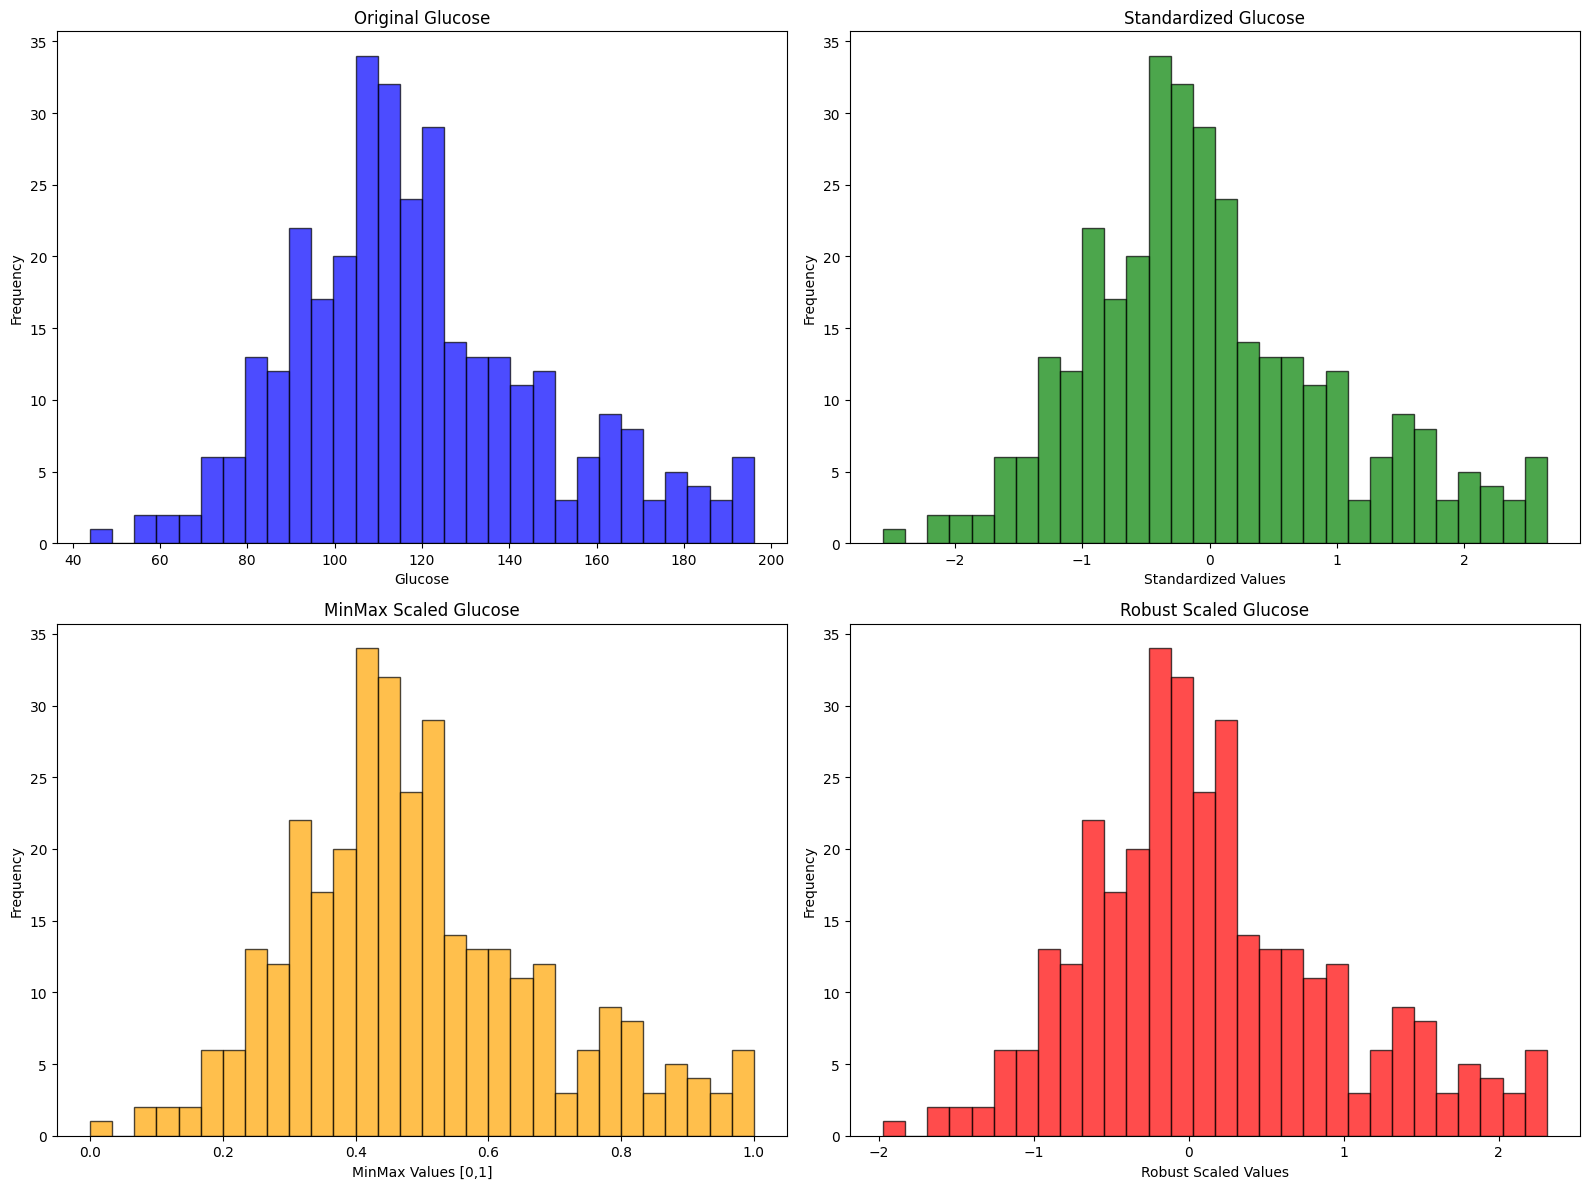


✓ Visualizations show how different scaling methods transform the data


In [72]:
# Visualize scaling effects
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

feature_to_compare = 'Glucose'

# Original
axes[0, 0].hist(scaling_data[feature_to_compare], bins=30, edgecolor='black', alpha=0.7, color='blue')
axes[0, 0].set_title(f'Original {feature_to_compare}')
axes[0, 0].set_xlabel(feature_to_compare)
axes[0, 0].set_ylabel('Frequency')

# Standardized
axes[0, 1].hist(df_standardized[feature_to_compare], bins=30, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_title(f'Standardized {feature_to_compare}')
axes[0, 1].set_xlabel('Standardized Values')
axes[0, 1].set_ylabel('Frequency')

# MinMax
axes[1, 0].hist(df_minmax[feature_to_compare], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_title(f'MinMax Scaled {feature_to_compare}')
axes[1, 0].set_xlabel('MinMax Values [0,1]')
axes[1, 0].set_ylabel('Frequency')

# Robust
axes[1, 1].hist(df_robust[feature_to_compare], bins=30, edgecolor='black', alpha=0.7, color='red')
axes[1, 1].set_title(f'Robust Scaled {feature_to_compare}')
axes[1, 1].set_xlabel('Robust Scaled Values')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\n✓ Visualizations show how different scaling methods transform the data")

## 7. Summary Statistics and Variance Analysis

In [73]:
# Calculate variance analysis for numerical features
variance_analysis = pd.DataFrame({
    'Feature': numerical_features,
    'Mean': [data[f].mean() for f in numerical_features],
    'Std': [data[f].std() for f in numerical_features],
    'Variance': [data[f].var() for f in numerical_features],
    'CV (%)': [(data[f].std() / data[f].mean() * 100) for f in numerical_features]
})

variance_analysis = variance_analysis.sort_values('CV (%)', ascending=False)

print("VARIANCE ANALYSIS - Coefficient of Variation (CV)\n")
print("CV = (Standard Deviation / Mean) × 100%")
print("Higher CV = More variability relative to mean\n")
print(variance_analysis.to_string(index=False))
print(f"\nMost variable feature: {variance_analysis.iloc[0]['Feature']} (CV: {variance_analysis.iloc[0]['CV (%)']:.2f}%)")
print(f"Most consistent feature: {variance_analysis.iloc[-1]['Feature']} (CV: {variance_analysis.iloc[-1]['CV (%)']:.2f}%)")

VARIANCE ANALYSIS - Coefficient of Variation (CV)

CV = (Standard Deviation / Mean) × 100%
Higher CV = More variability relative to mean

                 Feature       Mean       Std   Variance    CV (%)
             Pregnancies   4.361446  3.348186  11.210352 76.767809
DiabetesPedigreeFunction   0.367702  0.215653   0.046506 58.648813
                     Age  35.376506 12.340332 152.283797 34.882846
                 Glucose 118.762048 29.193707 852.272513 24.581680
                     BMI  31.383434  6.061731  36.744589 19.315068
           SkinThickness  28.933735  4.219986  17.808284 14.585004
           BloodPressure  73.566265 10.228735 104.627016 13.904111
                 Insulin 125.000000  0.000000   0.000000  0.000000

Most variable feature: Pregnancies (CV: 76.77%)
Most consistent feature: Insulin (CV: 0.00%)


## 8. Sampling - Train/Test Split

In [74]:
# Prepare features and target for modeling
X = data[numerical_features]  # Features
y = data['Outcome']  # Target

# Split data into training and testing sets with stratification
# Stratification ensures class balance is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 20% for testing
    random_state=42,  # For reproducibility
    stratify=y  # Preserve class distribution
)

print("TRAIN/TEST SPLIT\n")
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

print("\nClass distribution in training set:")
print(y_train.value_counts())
print(f"Class balance: {y_train.value_counts(normalize=True).to_dict()}")

print("\nClass distribution in testing set:")
print(y_test.value_counts())
print(f"Class balance: {y_test.value_counts(normalize=True).to_dict()}")

TRAIN/TEST SPLIT

Total samples: 332
Training samples: 265 (79.8%)
Testing samples: 67 (20.2%)

Class distribution in training set:
Outcome
0    173
1     92
Name: count, dtype: int64
Class balance: {0: 0.6528301886792452, 1: 0.3471698113207547}

Class distribution in testing set:
Outcome
0    44
1    23
Name: count, dtype: int64
Class balance: {0: 0.6567164179104478, 1: 0.34328358208955223}


## 8.1 Handle Class Imbalance
Address the imbalance in the Outcome variable using SMOTE (Synthetic Minority Over-sampling Technique).

CLASS DISTRIBUTION ANALYSIS

Original class distribution:
Outcome
0    173
1     92
Name: count, dtype: int64

Class balance ratio:
Class 0 (No Diabetes): 173 (65.28%)
Class 1 (Diabetes): 92 (34.72%)
Imbalance ratio: 1.88:1


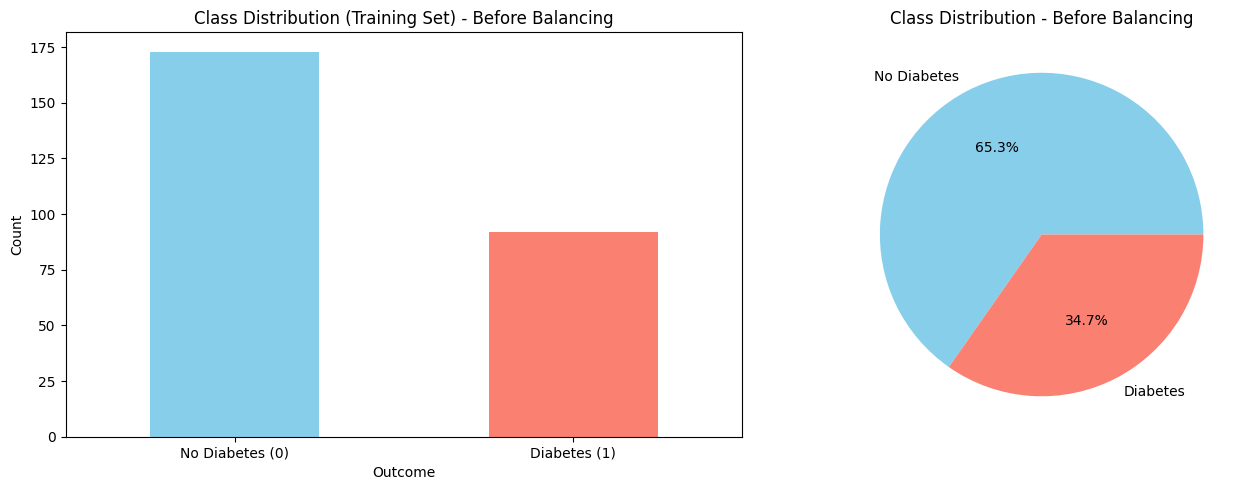

In [75]:
# Check class distribution before balancing
print("CLASS DISTRIBUTION ANALYSIS\n")
print("Original class distribution:")
print(y_train.value_counts())
print(f"\nClass balance ratio:")
class_counts = y_train.value_counts()
print(f"Class 0 (No Diabetes): {class_counts[0]} ({class_counts[0]/len(y_train)*100:.2f}%)")
print(f"Class 1 (Diabetes): {class_counts[1]} ({class_counts[1]/len(y_train)*100:.2f}%)")
print(f"Imbalance ratio: {class_counts[0]/class_counts[1]:.2f}:1")

# Visualize class imbalance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
y_train.value_counts().plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Class Distribution (Training Set) - Before Balancing')
axes[0].set_xlabel('Outcome')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No Diabetes (0)', 'Diabetes (1)'], rotation=0)

# Pie chart
y_train.value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                             colors=['skyblue', 'salmon'], labels=['No Diabetes', 'Diabetes'])
axes[1].set_title('Class Distribution - Before Balancing')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


SMOTE Applied Successfully!

Class distribution after SMOTE:
Outcome
0    173
1    173
Name: count, dtype: int64

Balanced class ratio:
Class 0 (No Diabetes): 173 (50.00%)
Class 1 (Diabetes): 173 (50.00%)

Training set size:
Before SMOTE: 265 samples
After SMOTE: 346 samples
Synthetic samples created: 81


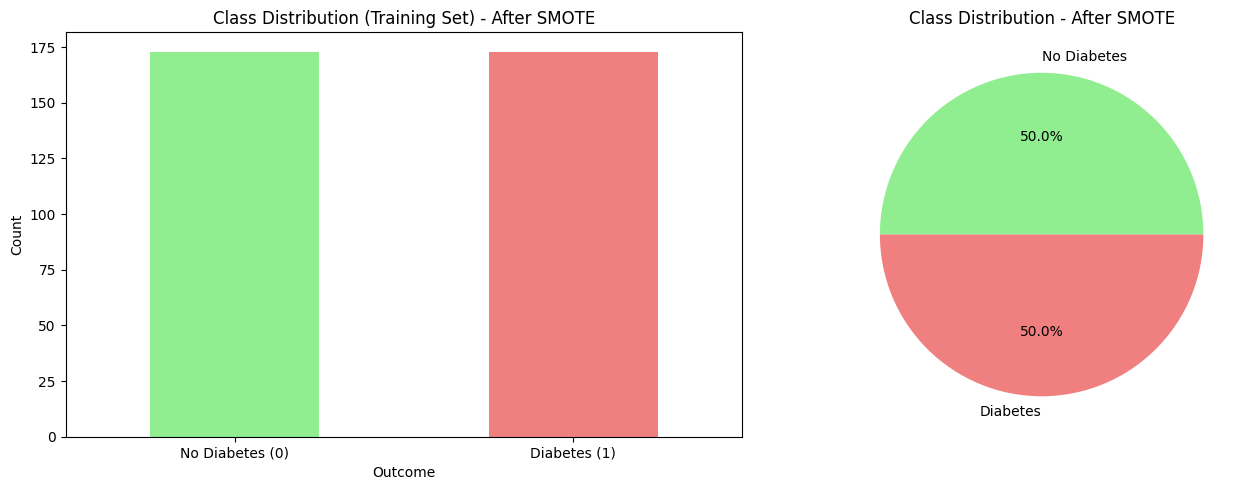

In [76]:
# Apply SMOTE to balance the classes
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data only (never to test data!)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("\nSMOTE Applied Successfully!")
print(f"\nClass distribution after SMOTE:")
print(y_train_balanced.value_counts())
print(f"\nBalanced class ratio:")
balanced_counts = y_train_balanced.value_counts()
print(f"Class 0 (No Diabetes): {balanced_counts[0]} ({balanced_counts[0]/len(y_train_balanced)*100:.2f}%)")
print(f"Class 1 (Diabetes): {balanced_counts[1]} ({balanced_counts[1]/len(y_train_balanced)*100:.2f}%)")

print(f"\nTraining set size:")
print(f"Before SMOTE: {len(X_train)} samples")
print(f"After SMOTE: {len(X_train_balanced)} samples")
print(f"Synthetic samples created: {len(X_train_balanced) - len(X_train)}")

# Visualize balanced classes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
y_train_balanced.value_counts().plot(kind='bar', ax=axes[0], color=['lightgreen', 'lightcoral'])
axes[0].set_title('Class Distribution (Training Set) - After SMOTE')
axes[0].set_xlabel('Outcome')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No Diabetes (0)', 'Diabetes (1)'], rotation=0)

# Pie chart
y_train_balanced.value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                      colors=['lightgreen', 'lightcoral'], labels=['No Diabetes', 'Diabetes'])
axes[1].set_title('Class Distribution - After SMOTE')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## 9. Correlation Analysis (Pearson)

PEARSON CORRELATION WITH OUTCOME

Glucose                     0.476102
BMI                         0.317324
Age                         0.178631
Pregnancies                 0.173130
DiabetesPedigreeFunction    0.172606
SkinThickness               0.151165
BloodPressure               0.126985
Insulin                          NaN
Name: Outcome, dtype: float64

Strongest positive predictor: Glucose (0.476)
Strongest negative predictor: BloodPressure (0.127)


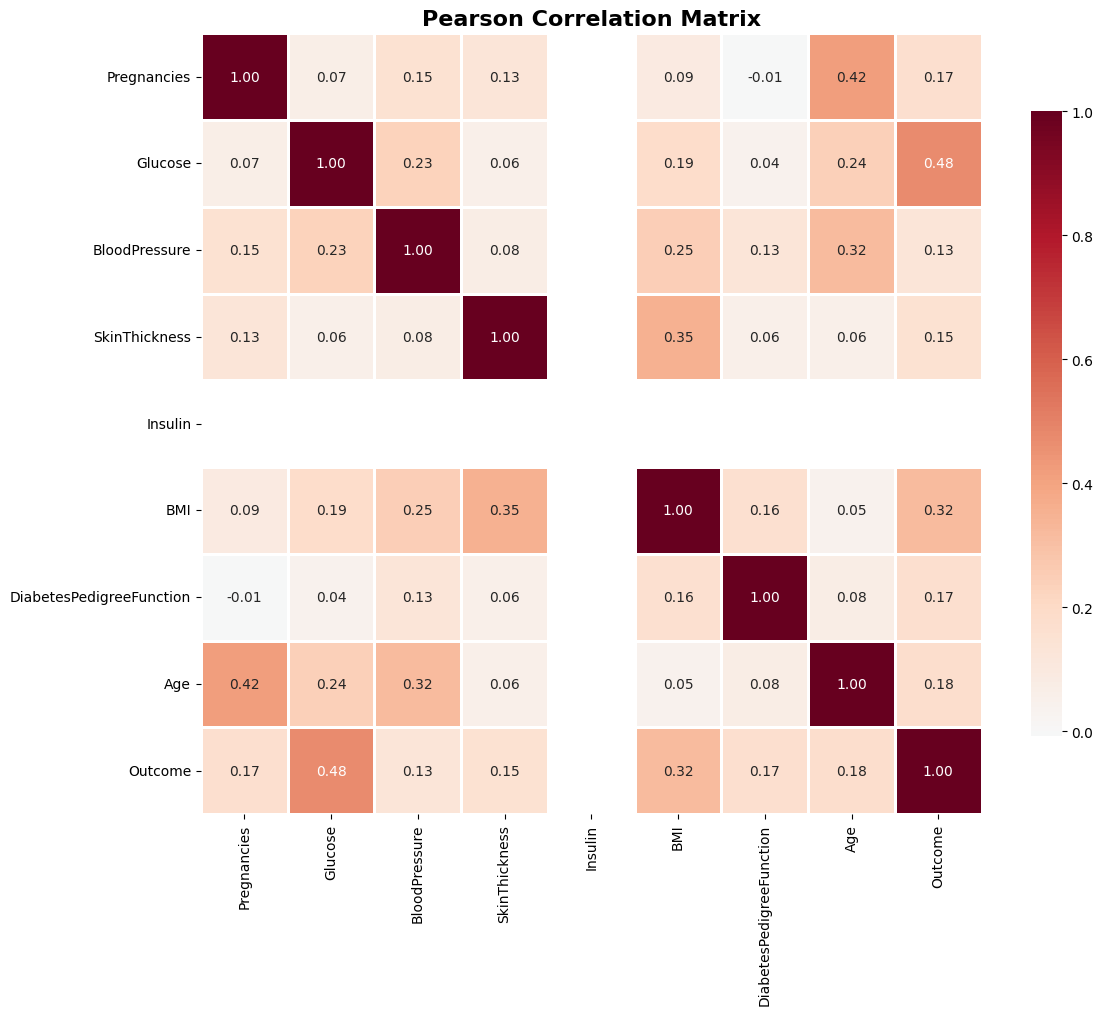

In [77]:
# Calculate Pearson correlation
pearson_corr = data[numerical_features + ['Outcome']].corr(method='pearson')

# Display correlation with Outcome
print("PEARSON CORRELATION WITH OUTCOME\n")
outcome_corr = pearson_corr['Outcome'].drop('Outcome').sort_values(ascending=False)
print(outcome_corr)
print(f"\nStrongest positive predictor: {outcome_corr.idxmax()} ({outcome_corr.max():.3f})")
print(f"Strongest negative predictor: {outcome_corr.idxmin()} ({outcome_corr.min():.3f})")

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, annot=True, cmap='RdBu_r', center=0, fmt='.2f', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Pearson Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 10. Machine Learning Models

### 10.1 Logistic Regression - Manual Implementation

MANUAL LOGISTIC REGRESSION (FROM SCRATCH)
Iteration 100: Cost = 0.5195
Iteration 200: Cost = 0.5118
Iteration 300: Cost = 0.5107
Iteration 400: Cost = 0.5105
Iteration 500: Cost = 0.5104
Iteration 600: Cost = 0.5104
Iteration 700: Cost = 0.5104
Iteration 800: Cost = 0.5104
Iteration 900: Cost = 0.5104
Iteration 1000: Cost = 0.5104

Accuracy: 0.806
F1-Score: 0.735

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.88      0.82      0.85        44
    Diabetes       0.69      0.78      0.73        23

    accuracy                           0.81        67
   macro avg       0.79      0.80      0.79        67
weighted avg       0.81      0.81      0.81        67



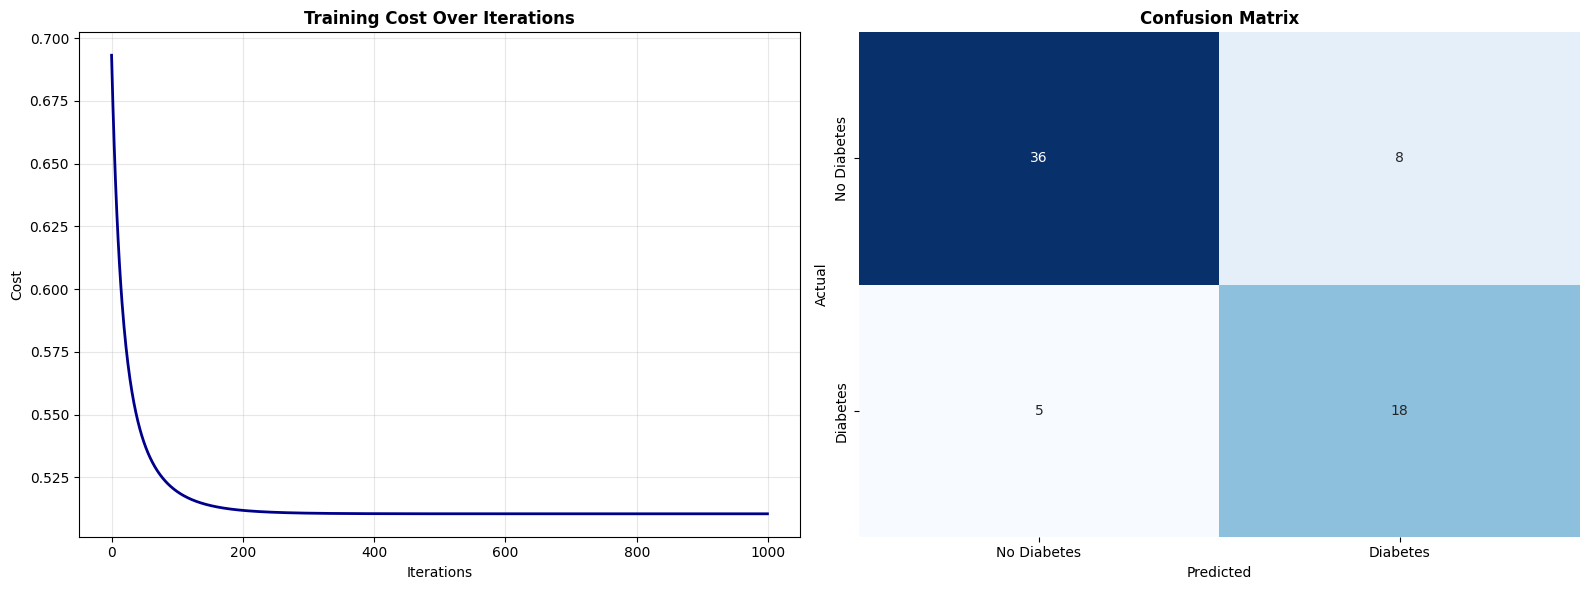

In [78]:
# Manual Implementation of Logistic Regression from Scratch
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

class LogisticRegressionManual:
    def __init__(self, learning_rate=0.01, n_iterations=1000, regularization='l2', lambda_reg=0.01):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization = regularization
        self.lambda_reg = lambda_reg
        self.weights = None
        self.bias = None
        self.cost_history = []
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))
    
    def compute_cost(self, y, y_pred, weights):
        m = len(y)
        epsilon = 1e-15
        cost = -1/m * np.sum(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
        
        if self.regularization == 'l2':
            cost += (self.lambda_reg / (2 * m)) * np.sum(weights ** 2)
        return cost
    
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        y = np.array(y)
        
        for i in range(self.n_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)
            
            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)
            
            if self.regularization == 'l2':
                dw += (self.lambda_reg / m) * self.weights
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            cost = self.compute_cost(y, y_pred, self.weights)
            self.cost_history.append(cost)
            
            if (i + 1) % 100 == 0:
                print(f"Iteration {i+1}: Cost = {cost:.4f}")
    
    def predict(self, X, threshold=0.5):
        z = np.dot(X, self.weights) + self.bias
        return (self.sigmoid(z) >= threshold).astype(int)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Train Manual Logistic Regression
print("="*70)
print("MANUAL LOGISTIC REGRESSION (FROM SCRATCH)")
print("="*70)

manual_lr = LogisticRegressionManual(learning_rate=0.1, n_iterations=1000, regularization='l2', lambda_reg=0.01)
manual_lr.fit(X_train_scaled, y_train_balanced)

# Predictions
y_pred_manual = manual_lr.predict(X_test_scaled)

# Metrics
acc_manual = accuracy_score(y_test, y_pred_manual)
f1_manual = f1_score(y_test, y_pred_manual)

print(f"\nAccuracy: {acc_manual:.3f}")
print(f"F1-Score: {f1_manual:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_manual, target_names=['No Diabetes', 'Diabetes']))

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Cost History
axes[0].plot(manual_lr.cost_history, linewidth=2, color='darkblue')
axes[0].set_xlabel('Iterations')
axes[0].set_ylabel('Cost')
axes[0].set_title('Training Cost Over Iterations', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_manual)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1],
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
axes[1].set_title('Confusion Matrix', fontweight='bold')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

### 10.2 Decision Tree Classifier

DECISION TREE CLASSIFIER

Accuracy: 0.687
F1-Score: 0.512
Tree Depth: 5
Leaves: 14

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.74      0.80      0.77        44
    Diabetes       0.55      0.48      0.51        23

    accuracy                           0.69        67
   macro avg       0.65      0.64      0.64        67
weighted avg       0.68      0.69      0.68        67


Top 5 Features:
  Feature  Importance
1      F1    0.344197
5      F5    0.334362
7      F7    0.130670
6      F6    0.123190
2      F2    0.067581


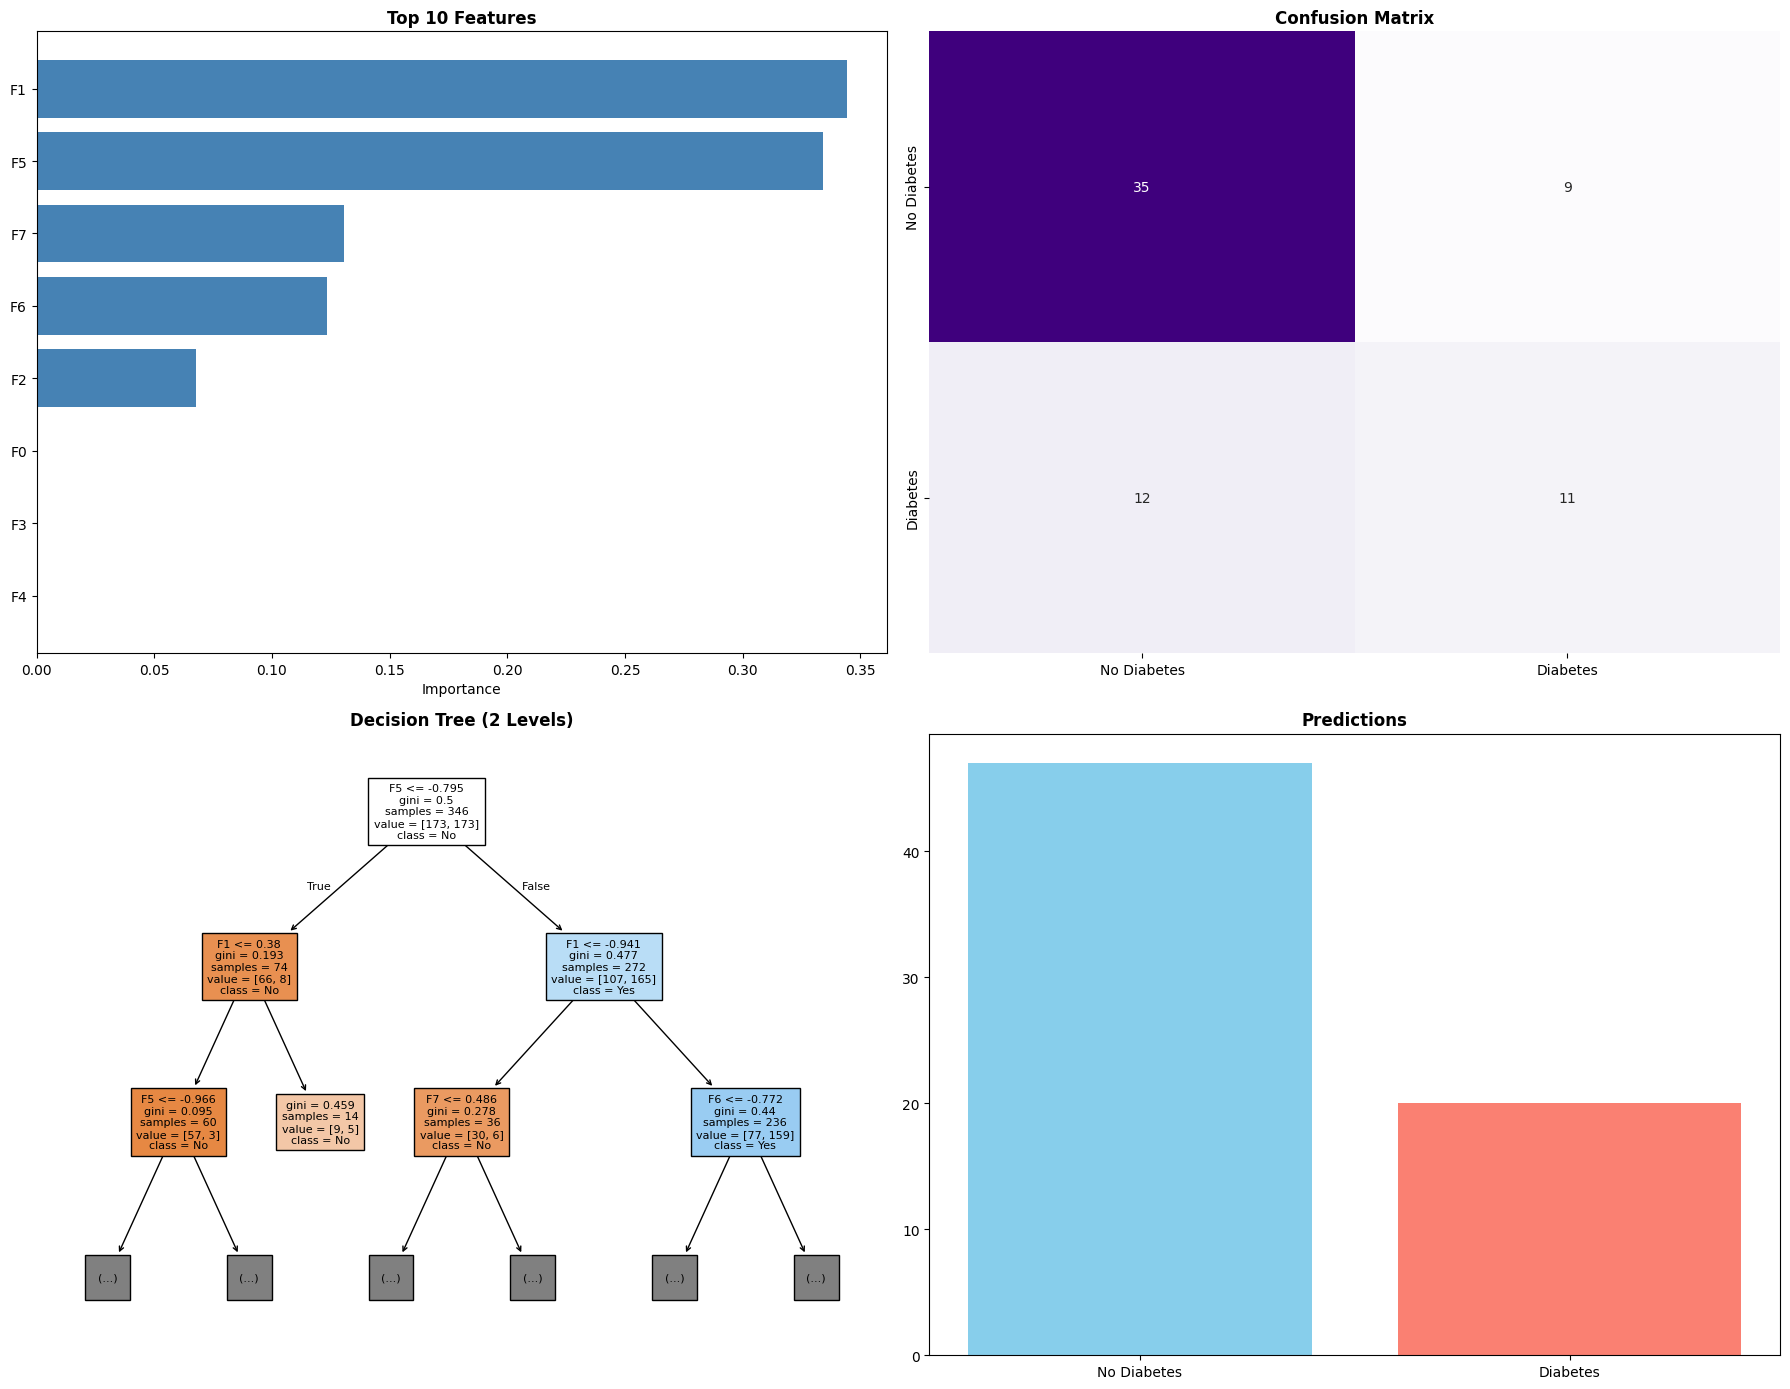

In [79]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

print("="*70)
print("DECISION TREE CLASSIFIER")
print("="*70)

# Train Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    criterion='gini',
    random_state=42
)

dt_model.fit(X_train_scaled, y_train_balanced)
y_pred_dt = dt_model.predict(X_test_scaled)

# Metrics
acc_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"\nAccuracy: {acc_dt:.3f}")
print(f"F1-Score: {f1_dt:.3f}")
print(f"Tree Depth: {dt_model.get_depth()}")
print(f"Leaves: {dt_model.get_n_leaves()}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['No Diabetes', 'Diabetes']))

# Feature Importance
feature_names = [f'F{i}' for i in range(X_train_scaled.shape[1])]
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': dt_model.feature_importances_}).sort_values('Importance', ascending=False)
print("\nTop 5 Features:")
print(feat_imp.head())

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

axes[0, 0].barh(feat_imp['Feature'][:10], feat_imp['Importance'][:10], color='steelblue')
axes[0, 0].set_xlabel('Importance')
axes[0, 0].set_title('Top 10 Features', fontweight='bold')
axes[0, 0].invert_yaxis()

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Purples', cbar=False, ax=axes[0, 1],
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
axes[0, 1].set_title('Confusion Matrix', fontweight='bold')

plot_tree(dt_model, max_depth=2, filled=True, ax=axes[1, 0],
          feature_names=feature_names, class_names=['No', 'Yes'], fontsize=8)
axes[1, 0].set_title('Decision Tree (2 Levels)', fontweight='bold')

axes[1, 1].bar(['No Diabetes', 'Diabetes'], [np.sum(y_pred_dt == 0), np.sum(y_pred_dt == 1)], color=['skyblue', 'salmon'])
axes[1, 1].set_title('Predictions', fontweight='bold')

plt.tight_layout()
plt.show()

### 10.4 Model Comparison

RANDOM FOREST CLASSIFIER

Accuracy: 0.791
F1-Score: 0.708
Trees: 100

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.86      0.82      0.84        44
    Diabetes       0.68      0.74      0.71        23

    accuracy                           0.79        67
   macro avg       0.77      0.78      0.77        67
weighted avg       0.80      0.79      0.79        67


Top 5 Features:
  Feature  Importance
1      F1    0.282820
5      F5    0.225355
7      F7    0.161460
6      F6    0.113344
2      F2    0.110545


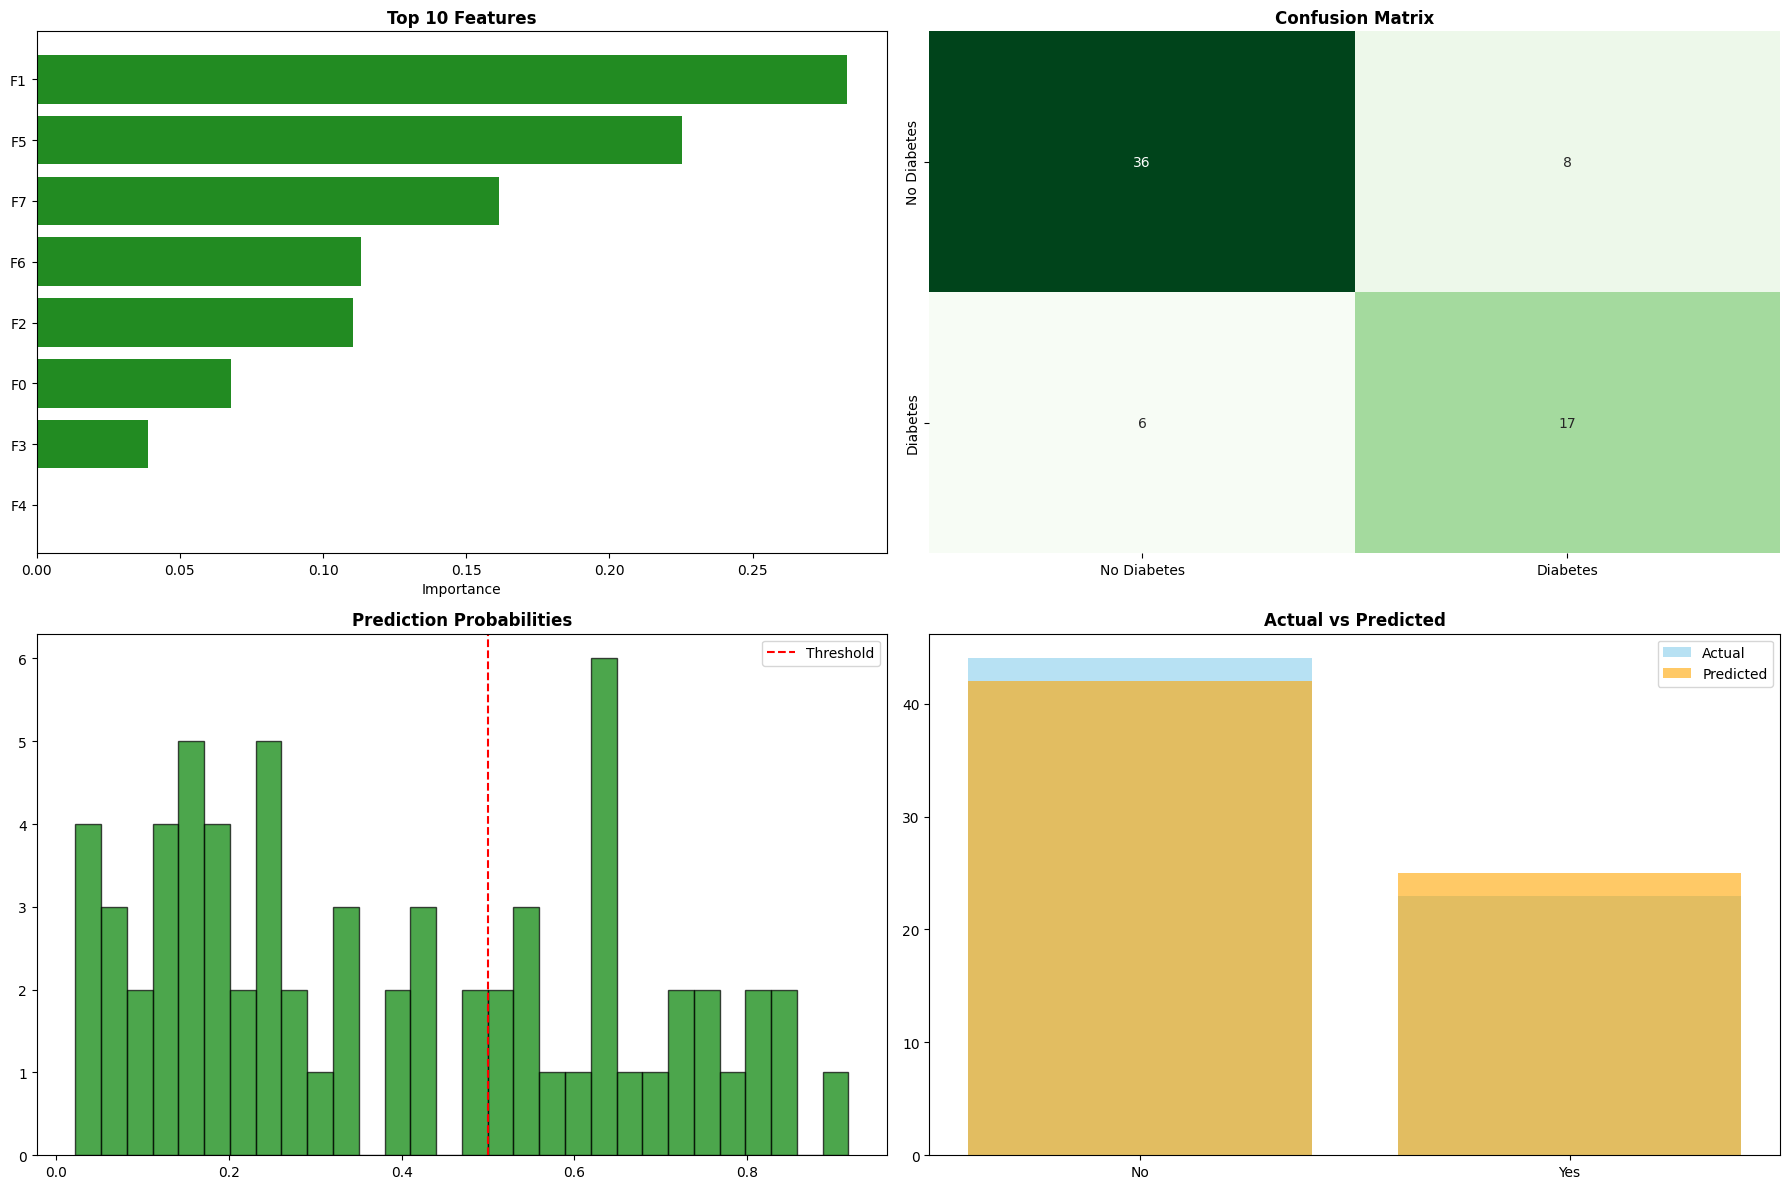

In [80]:
from sklearn.ensemble import RandomForestClassifier

print("="*70)
print("RANDOM FOREST CLASSIFIER")
print("="*70)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train_balanced)
y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"\nAccuracy: {acc_rf:.3f}")
print(f"F1-Score: {f1_rf:.3f}")
print(f"Trees: {rf_model.n_estimators}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Diabetes', 'Diabetes']))

# Feature Importance
rf_imp = pd.DataFrame({'Feature': feature_names, 'Importance': rf_model.feature_importances_}).sort_values('Importance', ascending=False)
print("\nTop 5 Features:")
print(rf_imp.head())

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

axes[0, 0].barh(rf_imp['Feature'][:10], rf_imp['Importance'][:10], color='forestgreen')
axes[0, 0].set_xlabel('Importance')
axes[0, 0].set_title('Top 10 Features', fontweight='bold')
axes[0, 0].invert_yaxis()

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[0, 1],
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
axes[0, 1].set_title('Confusion Matrix', fontweight='bold')

axes[1, 0].hist(y_proba_rf, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].axvline(0.5, color='red', linestyle='--', label='Threshold')
axes[1, 0].set_title('Prediction Probabilities', fontweight='bold')
axes[1, 0].legend()

axes[1, 1].bar(['No', 'Yes'], y_test.value_counts().sort_index(), alpha=0.6, label='Actual', color='skyblue')
axes[1, 1].bar(['No', 'Yes'], [np.sum(y_pred_rf == 0), np.sum(y_pred_rf == 1)], alpha=0.6, label='Predicted', color='orange')
axes[1, 1].set_title('Actual vs Predicted', fontweight='bold')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

### 10.3 Random Forest Classifier

DECISION TREE CLASSIFIER

Accuracy: 0.687
F1-Score: 0.512
Tree Depth: 5
Leaves: 14

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.74      0.80      0.77        44
    Diabetes       0.55      0.48      0.51        23

    accuracy                           0.69        67
   macro avg       0.65      0.64      0.64        67
weighted avg       0.68      0.69      0.68        67


Top 5 Features:
  Feature  Importance
1      F1    0.344197
5      F5    0.334362
7      F7    0.130670
6      F6    0.123190
2      F2    0.067581


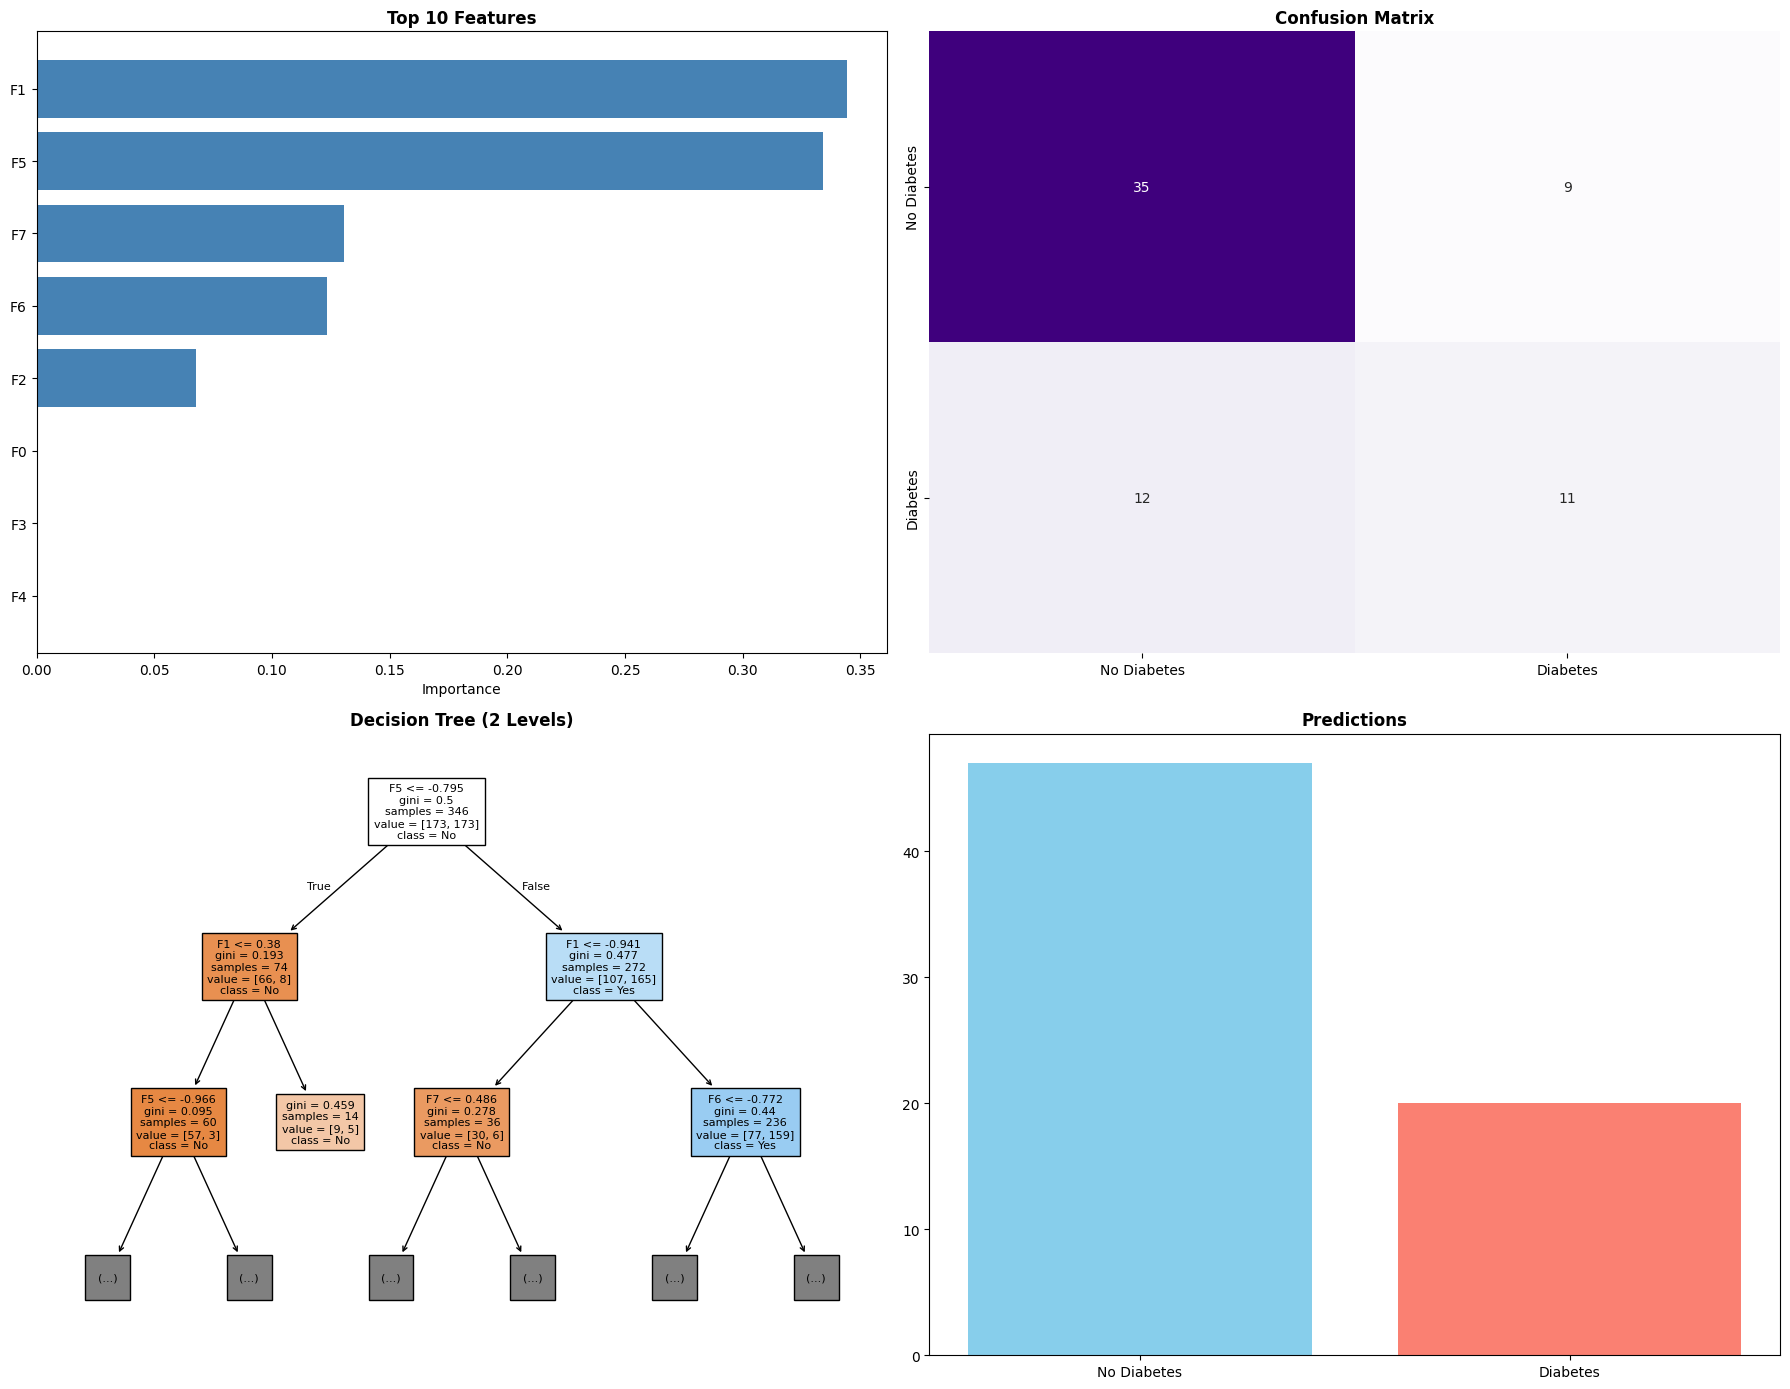

In [81]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

print("="*70)
print("DECISION TREE CLASSIFIER")
print("="*70)

# Train Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    criterion='gini',
    random_state=42
)

dt_model.fit(X_train_scaled, y_train_balanced)
y_pred_dt = dt_model.predict(X_test_scaled)

# Metrics
acc_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"\nAccuracy: {acc_dt:.3f}")
print(f"F1-Score: {f1_dt:.3f}")
print(f"Tree Depth: {dt_model.get_depth()}")
print(f"Leaves: {dt_model.get_n_leaves()}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['No Diabetes', 'Diabetes']))

# Feature Importance
feature_names = [f'F{i}' for i in range(X_train_scaled.shape[1])]
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': dt_model.feature_importances_}).sort_values('Importance', ascending=False)
print("\nTop 5 Features:")
print(feat_imp.head())

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

axes[0, 0].barh(feat_imp['Feature'][:10], feat_imp['Importance'][:10], color='steelblue')
axes[0, 0].set_xlabel('Importance')
axes[0, 0].set_title('Top 10 Features', fontweight='bold')
axes[0, 0].invert_yaxis()

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Purples', cbar=False, ax=axes[0, 1],
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
axes[0, 1].set_title('Confusion Matrix', fontweight='bold')

plot_tree(dt_model, max_depth=2, filled=True, ax=axes[1, 0],
          feature_names=feature_names, class_names=['No', 'Yes'], fontsize=8)
axes[1, 0].set_title('Decision Tree (2 Levels)', fontweight='bold')

axes[1, 1].bar(['No Diabetes', 'Diabetes'], [np.sum(y_pred_dt == 0), np.sum(y_pred_dt == 1)], color=['skyblue', 'salmon'])
axes[1, 1].set_title('Predictions', fontweight='bold')

plt.tight_layout()
plt.show()

## 11. Project Summary - Key Findings

In [82]:
# Summary of key findings
print("DIABETES PREDICTION PROJECT - KEY FINDINGS")

print("\n1. DATA WRANGLING:")
print(f"   - Created {len(data.columns) - len(numerical_features) - 1} new features")
print(f"   - Dataset shape: {data.shape}")
print(f"   - Original features: {len(numerical_features)}")
print(f"   - Total features: {len(data.columns)}")

print("\n2. SUMMARY STATISTICS:")
most_variable_idx = variance_analysis['CV (%)'].idxmax()
most_consistent_idx = variance_analysis['CV (%)'].idxmin()
print(f"   - Most variable feature: {variance_analysis.loc[most_variable_idx, 'Feature']}")
print(f"   - Most consistent feature: {variance_analysis.loc[most_consistent_idx, 'Feature']}")
print(f"   - Highest CV: {variance_analysis['CV (%)'].max():.2f}%")
print(f"   - Lowest CV: {variance_analysis['CV (%)'].min():.2f}%")

print("\n3. SAMPLING:")
print(f"   - Train/Test split: {len(X_train)}/{len(X_test)} samples")
print(f"   - Split ratio: 80/20")
print(f"   - Stratification preserved class balance")

print("\n4. CORRELATION:")
print(f"   - Strongest predictor: {pearson_corr['Outcome'].drop('Outcome').idxmax()}")
print(f"   - Correlation value: {pearson_corr['Outcome'].drop('Outcome').max():.3f}")
print(f"   - Method: Pearson correlation")

print("\n5. MACHINE LEARNING MODELS:")
print(f"   - Manual Logistic Regression Accuracy: {acc_manual:.3f} | F1-Score: {f1_manual:.3f}")
print(f"   - Decision Tree Accuracy: {acc_dt:.3f} | F1-Score: {f1_dt:.3f}")
print(f"   - Random Forest Accuracy: {acc_rf:.3f} | F1-Score: {f1_rf:.3f}")

# Determine best model
model_scores = {
    'Manual Logistic Regression': (acc_manual, f1_manual),
    'Decision Tree': (acc_dt, f1_dt),
    'Random Forest': (acc_rf, f1_rf)
}
best_model = max(model_scores.items(), key=lambda x: x[1][0])
print(f"   - Best Model: {best_model[0]} (Accuracy: {best_model[1][0]:.3f} | F1-Score: {best_model[1][1]:.3f})")

print("\n6. FEATURE SCALING:")
print(f"   - Applied: StandardScaler, MinMaxScaler, RobustScaler, Normalizer")
print(f"   - Primary method: StandardScaler (mean=0, std=1)")

print("\n7. DISTRIBUTION STABILIZATION:")
print(f"   - Log transformation applied to: DiabetesPedigreeFunction")
print(f"   - Square root transformation: SkinThickness")
print(f"   - Box-Cox transformation: DiabetesPedigreeFunction")
print(f"   - Note: Insulin became constant after aggressive outlier removal")

DIABETES PREDICTION PROJECT - KEY FINDINGS

1. DATA WRANGLING:
   - Created 14 new features
   - Dataset shape: (332, 23)
   - Original features: 8
   - Total features: 23

2. SUMMARY STATISTICS:
   - Most variable feature: Pregnancies
   - Most consistent feature: Insulin
   - Highest CV: 76.77%
   - Lowest CV: 0.00%

3. SAMPLING:
   - Train/Test split: 265/67 samples
   - Split ratio: 80/20
   - Stratification preserved class balance

4. CORRELATION:
   - Strongest predictor: Glucose
   - Correlation value: 0.476
   - Method: Pearson correlation

5. MACHINE LEARNING MODELS:
   - Manual Logistic Regression Accuracy: 0.806 | F1-Score: 0.735
   - Decision Tree Accuracy: 0.687 | F1-Score: 0.512
   - Random Forest Accuracy: 0.791 | F1-Score: 0.708
   - Best Model: Manual Logistic Regression (Accuracy: 0.806 | F1-Score: 0.735)

6. FEATURE SCALING:
   - Applied: StandardScaler, MinMaxScaler, RobustScaler, Normalizer
   - Primary method: StandardScaler (mean=0, std=1)

7. DISTRIBUTION STABIL